# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

## **Importing Libraries**

In [125]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.utils import resample
from sklearn.model_selection import (
    GridSearchCV,
    KFold,
    cross_val_score,
    train_test_split,
)
from sklearn.metrics import (
    mean_squared_error as MSE,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)

## Data validation

In this module the team data was inverstigated in term of each column data type and data quality and modifiyed to meet the product team.

the modficaitons in this stage for each column:

**recipe** : set as index for the data frame since its unique identifier

**calories** : no changes have been applied

**carbohydrate** : no changes have been applied

**sugar** : no changes have been applied

**protein** : no changes have been applied

**category** : chicken breast was renamed to fit chicken category and dtype of column was changed to category

**servings** : removed redundant strings that conveyed the category since already there is category column and                  dtype of column was changed to int

**high_traffic** : Since the team documentation showed that only high traffic recipes were labeled the NAN values                    were replaced with 'not high' string

**Addtionally,** NAN values of other columns were removed changing the no of recipes from 947 to 895 which is considered acceptable amount of data to procced with the analysis and modeling

In [126]:
# Import Data from CSV
df_recipe_site = pd.read_csv('recipe_site_traffic_2212.csv')

# Valdiate that there aren't duplicates
df_recipe_site.drop_duplicates(inplace=True)

In [127]:
#Show a sample of the DATA
df_recipe_site.head(7)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,High
6,7,183.94,47.95,9.75,46.71,Chicken Breast,4,NaN


In [128]:
#Show DATA info
df_recipe_site.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 66.6+ KB


In [129]:
# set recipe as the index since it is unique identifier
df_recipe_site.set_index('recipe',drop=True,inplace=True)

<AxesSubplot: >

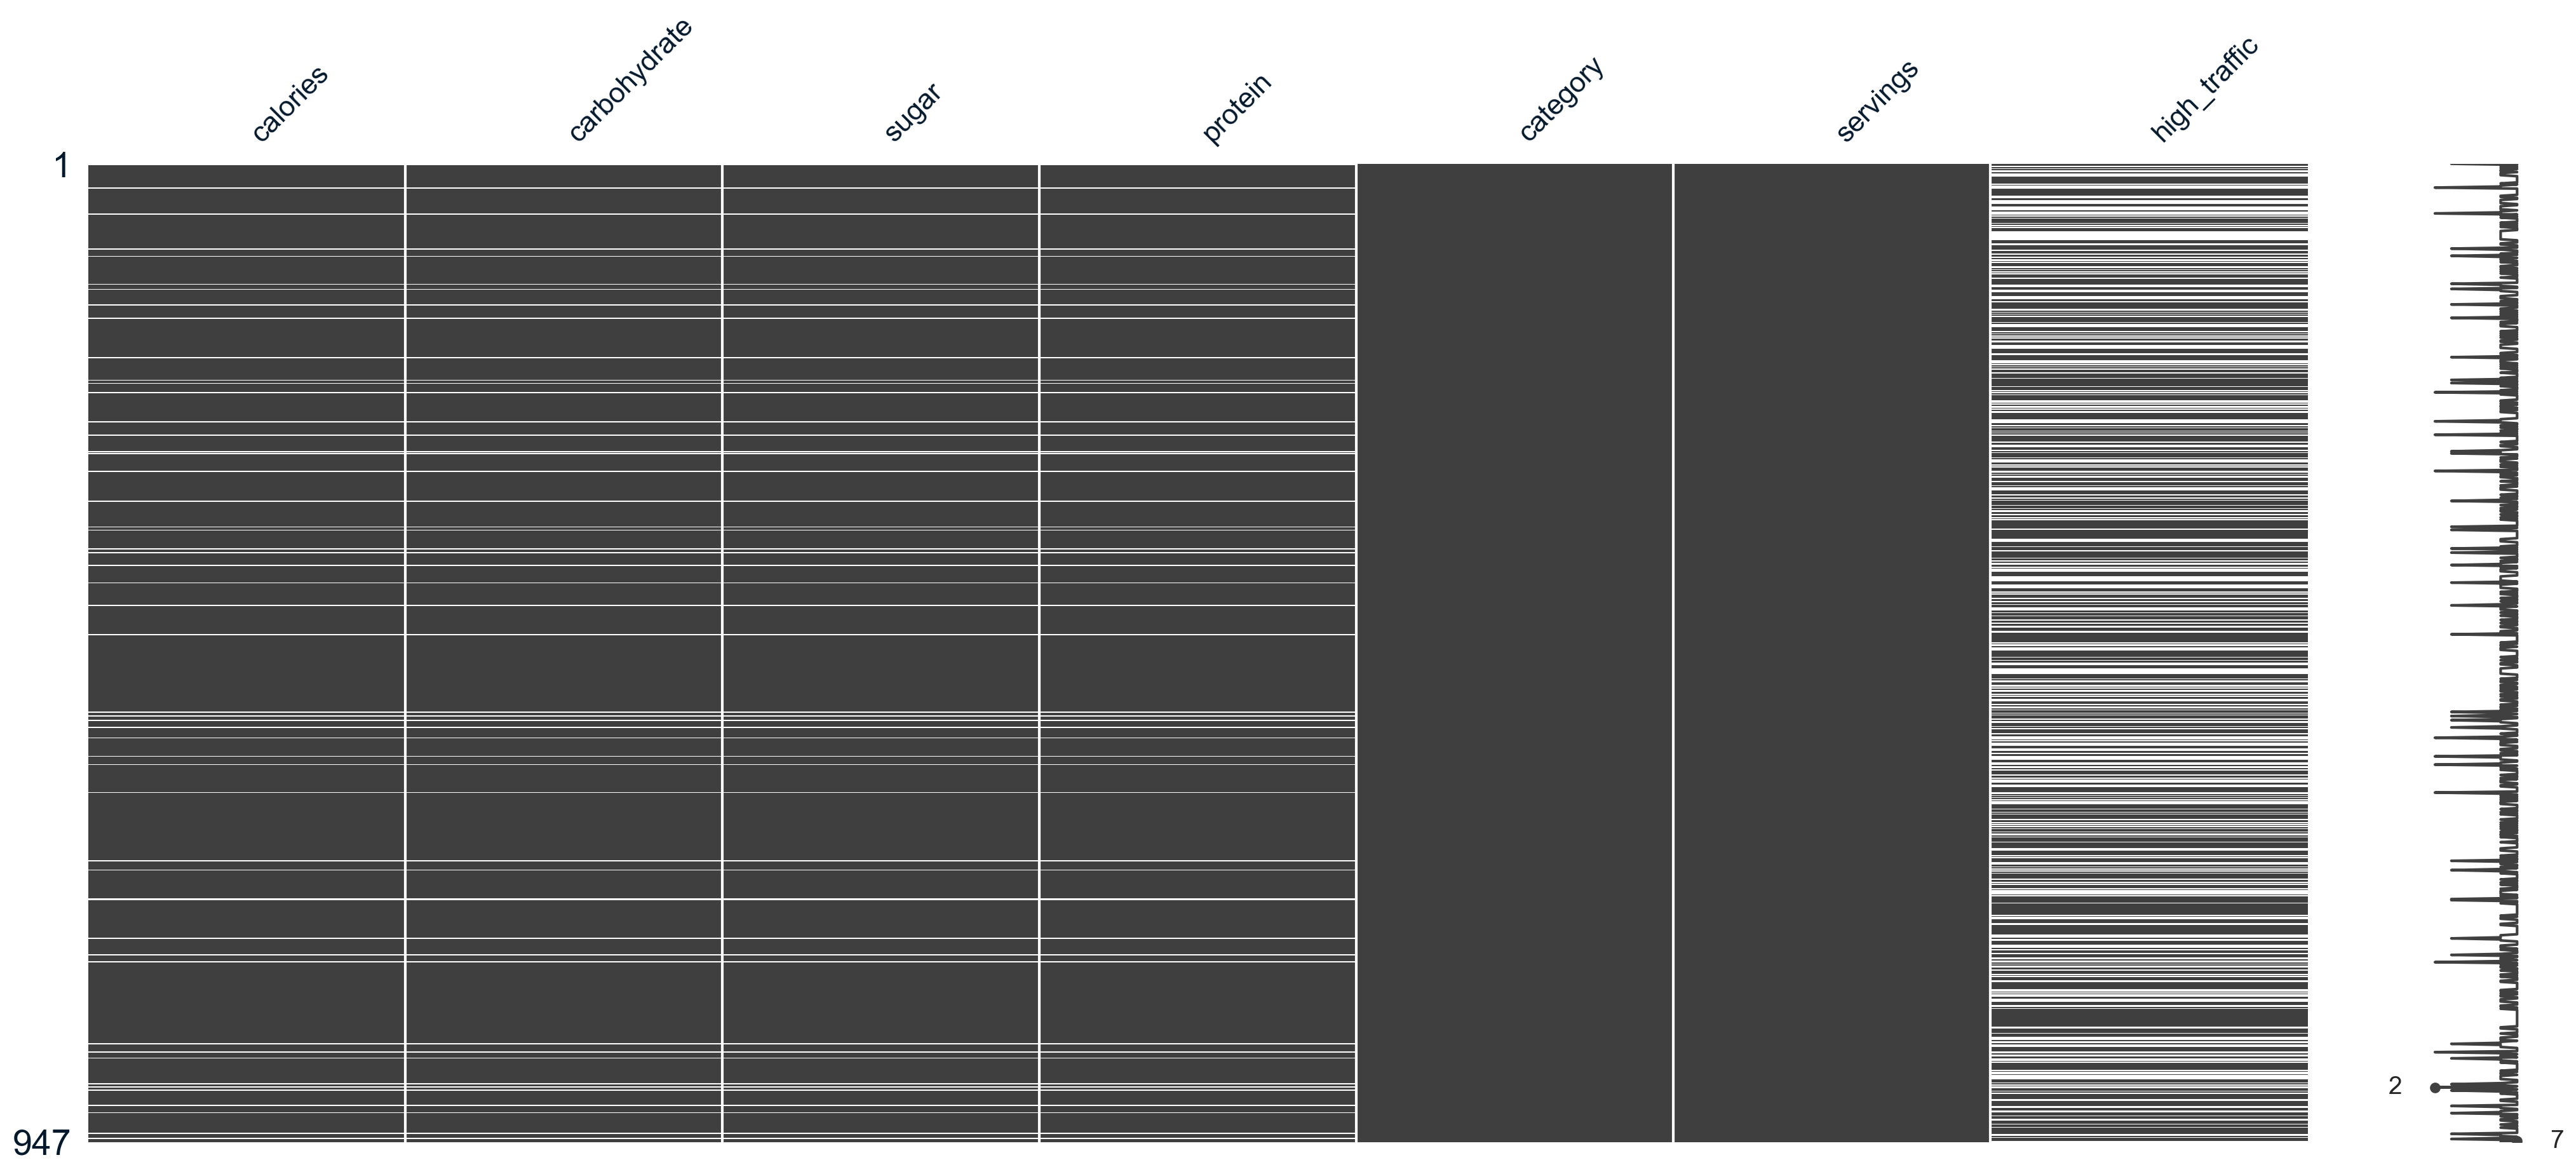

In [130]:
# Visulaize missing data using missingno
msno.matrix(df_recipe_site)

Here, the graph showed abundant NaN values in high_traffic column. according to the product team standard, NaN values are for non-high recipes therefore it need to be replaced with 'Not high' string before dropping NaN values of the Dataframe

In [131]:
# Replace NaN in traffic with Not High and modify column to category dtype
df_recipe_site['high_traffic'] = (
                                  df_recipe_site['high_traffic']
                                  .fillna('Not High')
                                  .astype('category')
                                  )

In [132]:
# Drop NaN values in in the whole Data
df_recipe_site.dropna(inplace=True)
print(df_recipe_site.shape)

(895, 7)


In [133]:
# investigate category columns to meet the product team standards
intended_list_of_categories =  ['Lunch/Snacks','Beverages',
                                'Potato','Vegetable',
                                'Meat', 'Chicken',
                                'Pork', 'Dessert',
                                'Breakfast','One Dish Meal']


for i in df_recipe_site['category'].unique():
  if i in intended_list_of_categories:
    continue
  else:
    print(f'{i} not in the categories standard')

Chicken Breast not in the categories standard


Here, Chicken Breast is additional category that doesn't meet with the product team standard therefore it was renamed to Chicken since this are categories so the data fits in this category

In [134]:
# change the name to fit its proper category
df_recipe_site.replace('Chicken Breast',
                       'Chicken',
                       inplace=True)

# assert only 10 unique categories as the intended team list
assert df_recipe_site['category'].nunique() == 10

# modify the dtype to category
df_recipe_site['category'] = df_recipe_site['category'].astype('category')

According to the product team standard, The servings column should be only the number of servings. after further investigation, the string values found in servings correctly confirmed it's category therefore the strings were removed and only int values were left then the dtype of the column was changed to int

In [135]:
# modify serving columns
print(df_recipe_site['servings'].unique())

# investigate if serving named as snack are actually in the snack category
df_recipe_site[df_recipe_site['servings'].str.contains('snack')]

['4' '1' '2' '6' '4 as a snack' '6 as a snack']


,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
452,1542.53,14.73,5.71,29.92,Lunch/Snacks,4 as a snack,High
549,1440.69,30.59,5.78,30.63,Lunch/Snacks,6 as a snack,High
736,513.75,65.87,18.63,18.39,Lunch/Snacks,4 as a snack,Not High


In [136]:
# Change serving to integer
for ind, row in df_recipe_site.iterrows():
    if 'snack' in row['servings']:
      df_recipe_site.at[ind,'servings'] = row['servings'][0]

df_recipe_site['servings'] = df_recipe_site['servings'].astype('int')

In [137]:
df_recipe_site['servings'].unique()

array([4, 1, 2, 6])

## Exploratory Analysis

In this module, the data frames were investigated to explore helpful findings for modeling.
**The main questions to investigate are:**

1.  Which category has high ratios of high traffic?
2.  What type of Distributions or Skewness do the numeric columns exhibit?
3. Are there any correlations between the columns that can predict high traffic occurrence?

In [138]:
# show summary statstics of the data
df_recipe_site.describe()

,calories,carbohydrate,sugar,protein,servings
count,895.000000,895.000000,895.000000,895.000000,895.000000
mean,435.939196,35.069676,9.046547,24.149296,3.458101
std,453.020997,43.949032,14.679176,36.369739,1.735979
min,0.140000,0.030000,0.010000,0.000000,1.000000
25%,110.430000,8.375000,1.690000,3.195000,2.000000
50%,288.550000,21.480000,4.550000,10.800000,4.000000
75%,597.650000,44.965000,9.800000,30.200000,4.000000
max,3633.160000,530.420000,148.750000,363.360000,6.000000


Describing the data gives a summary of statistics that can show indicators of the data's behavior. here the numeric columns (Except for servings) show a high difference between MAX and MIN which indicates that there might be existing outliers. Additionally, it seems the data doesn't follow normal distributions. those indicators will be further investigated in Q2

In [139]:
# set sns theme pallette and colors
sns.set_theme(style="darkgrid")

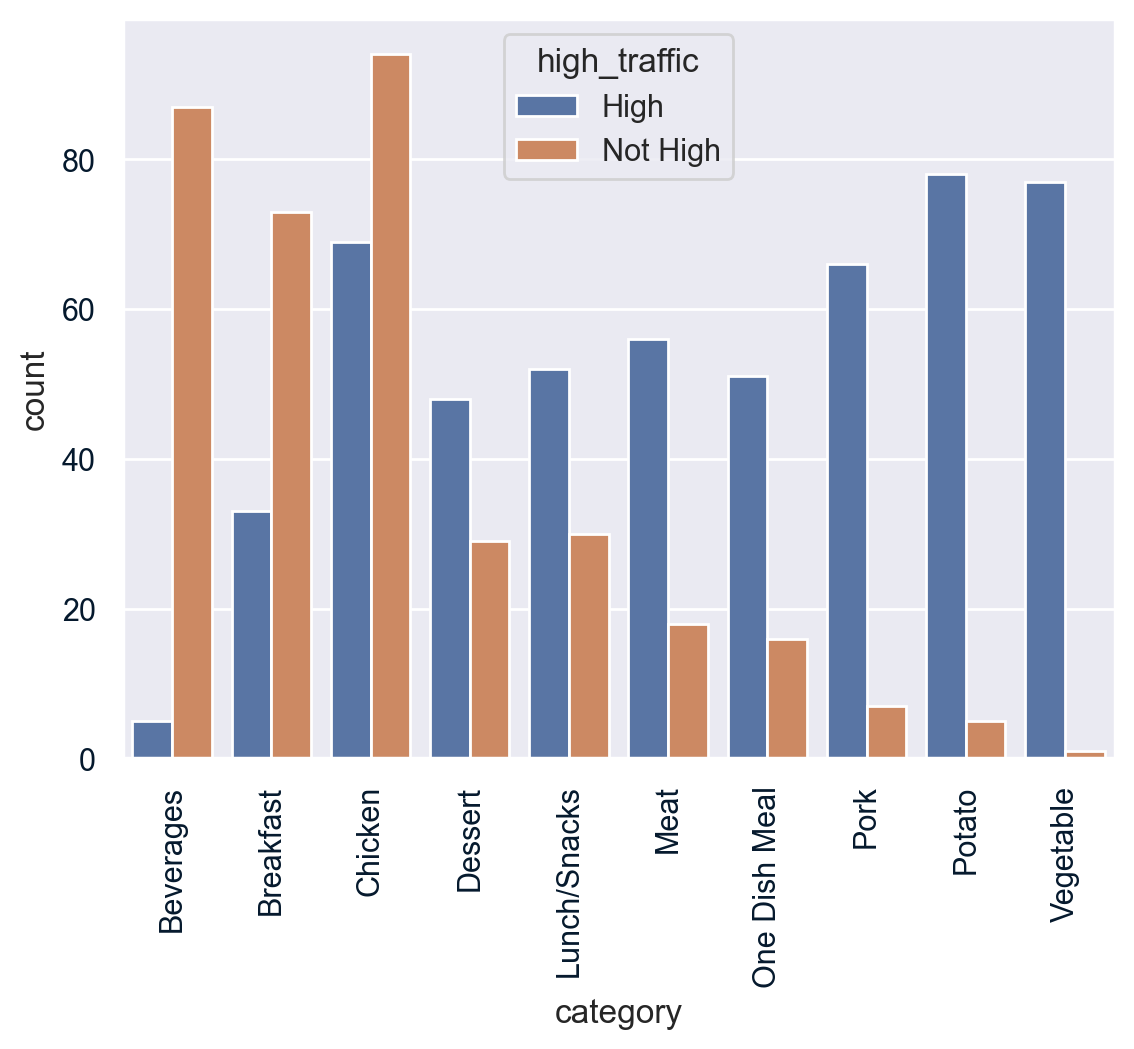

<Figure size 1000x1000 with 0 Axes>

In [140]:
# show count plot for each category with traffic as hue
sns.countplot(data=df_recipe_site,
              x= 'category',
              hue='high_traffic')

plt.xticks(rotation=90)
plt.figure(figsize=(10,10))
plt.show()

**Q1 Answer:** According to this graph, we can see clearly that vegetables, pork, and potatoes have a very high ratio of being rated high traffic with low ratio not being high. while chicken seems to be the 3rd highest in high traffic rate, however it also has a very high ratio to low traffic. beverages seem the least high-traffic category

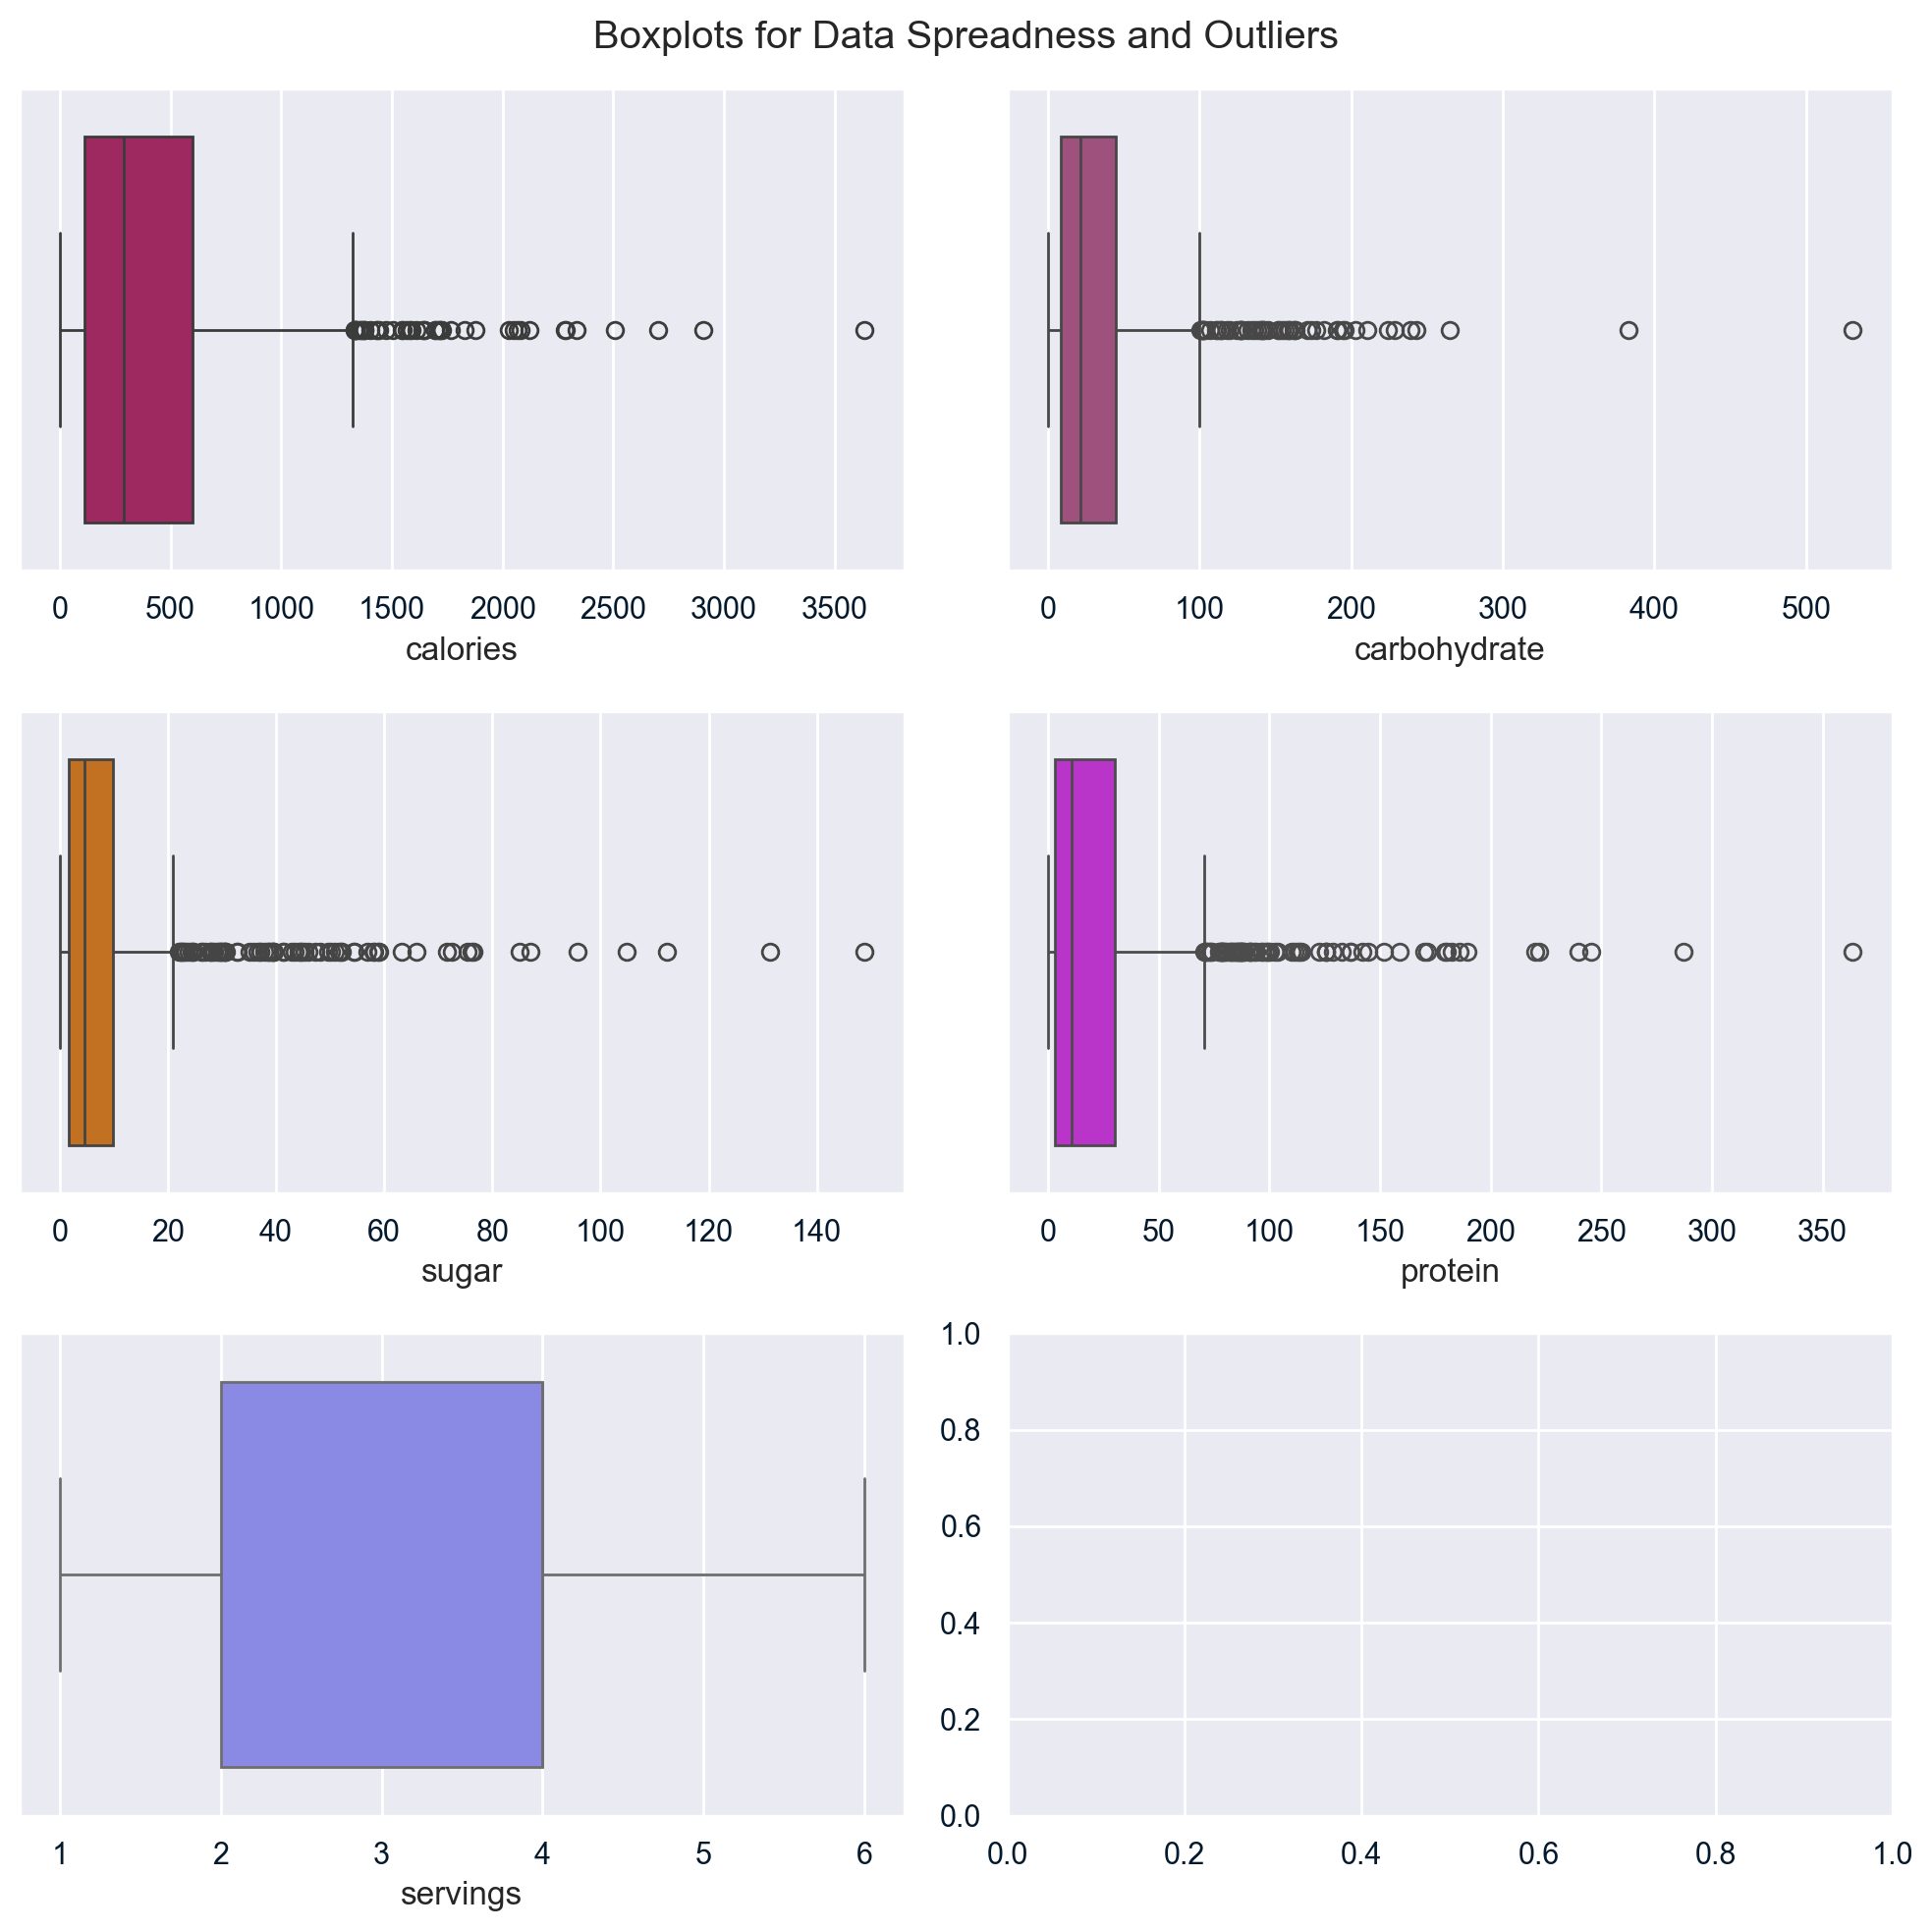

In [141]:
# show boxplot for each column to visualize spreadness and outliers
non_cat_cols = df_recipe_site.select_dtypes(exclude='category').columns
number_non_cat_cols = math.ceil(len(non_cat_cols)/2)

fig, ax = plt.subplots(number_non_cat_cols,2, figsize=(10, 10))
ax = ax.flatten()

for col in non_cat_cols:
  sns.boxplot(data=df_recipe_site,
              x=col,
              color=np.random.rand(3,),
              ax=ax[non_cat_cols.get_loc(col)])

fig.suptitle('Boxplots for Data Spreadness and Outliers')
plt.tight_layout()
plt.show()

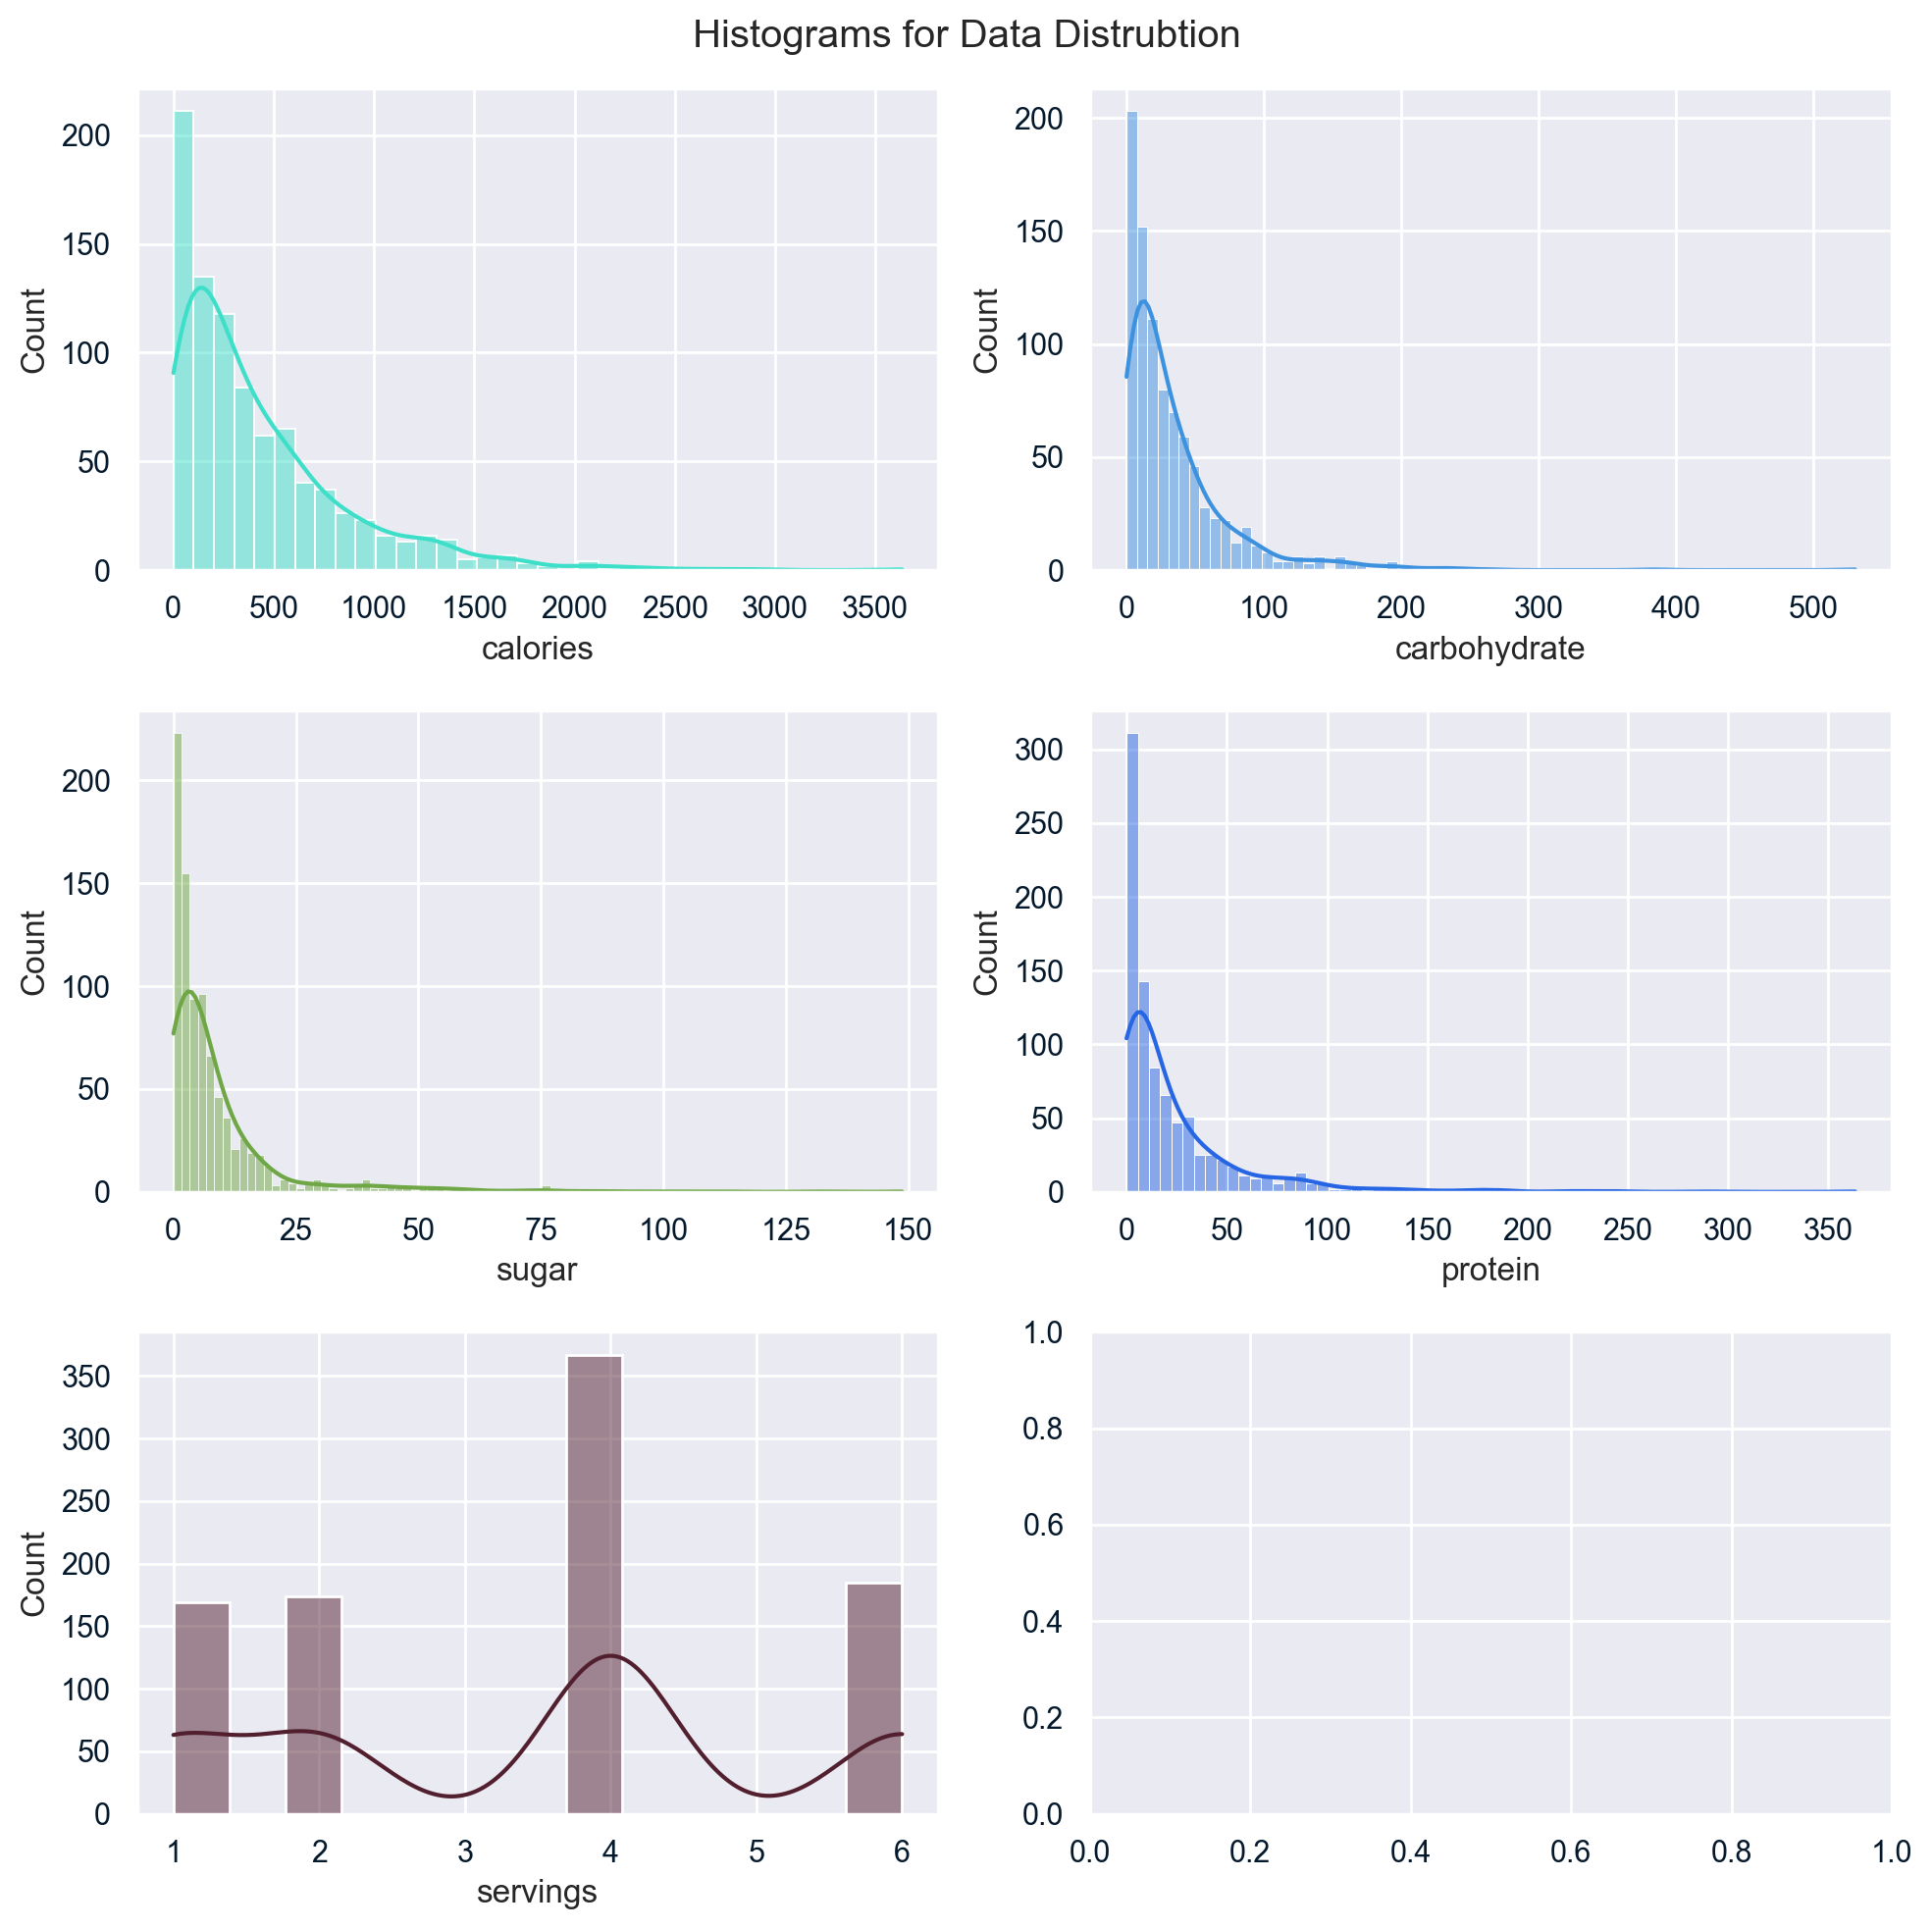

In [142]:
# show distrubtion for each column using histograms
fig2, ax2 = plt.subplots(number_non_cat_cols,2, figsize=(10, 10))
ax2 = ax2.flatten()

for col in non_cat_cols:
  sns.histplot(data=df_recipe_site,
              x=col,
              kde=True,
              color=np.random.rand(3,),
              ax=ax2[non_cat_cols.get_loc(col)])

fig2.suptitle('Histograms for Data Distrubtion')
plt.tight_layout()
plt.show()

**Q2 Answer:** According to both graphs, the boxplot showed that the data are strongly right skewed and may contain numerous outliers. however upon looking at the histplot the data seems that it doesnt follow normal distrubtion and rightly skewed therefore its is best to apply Powertransformer to reduce the skewness

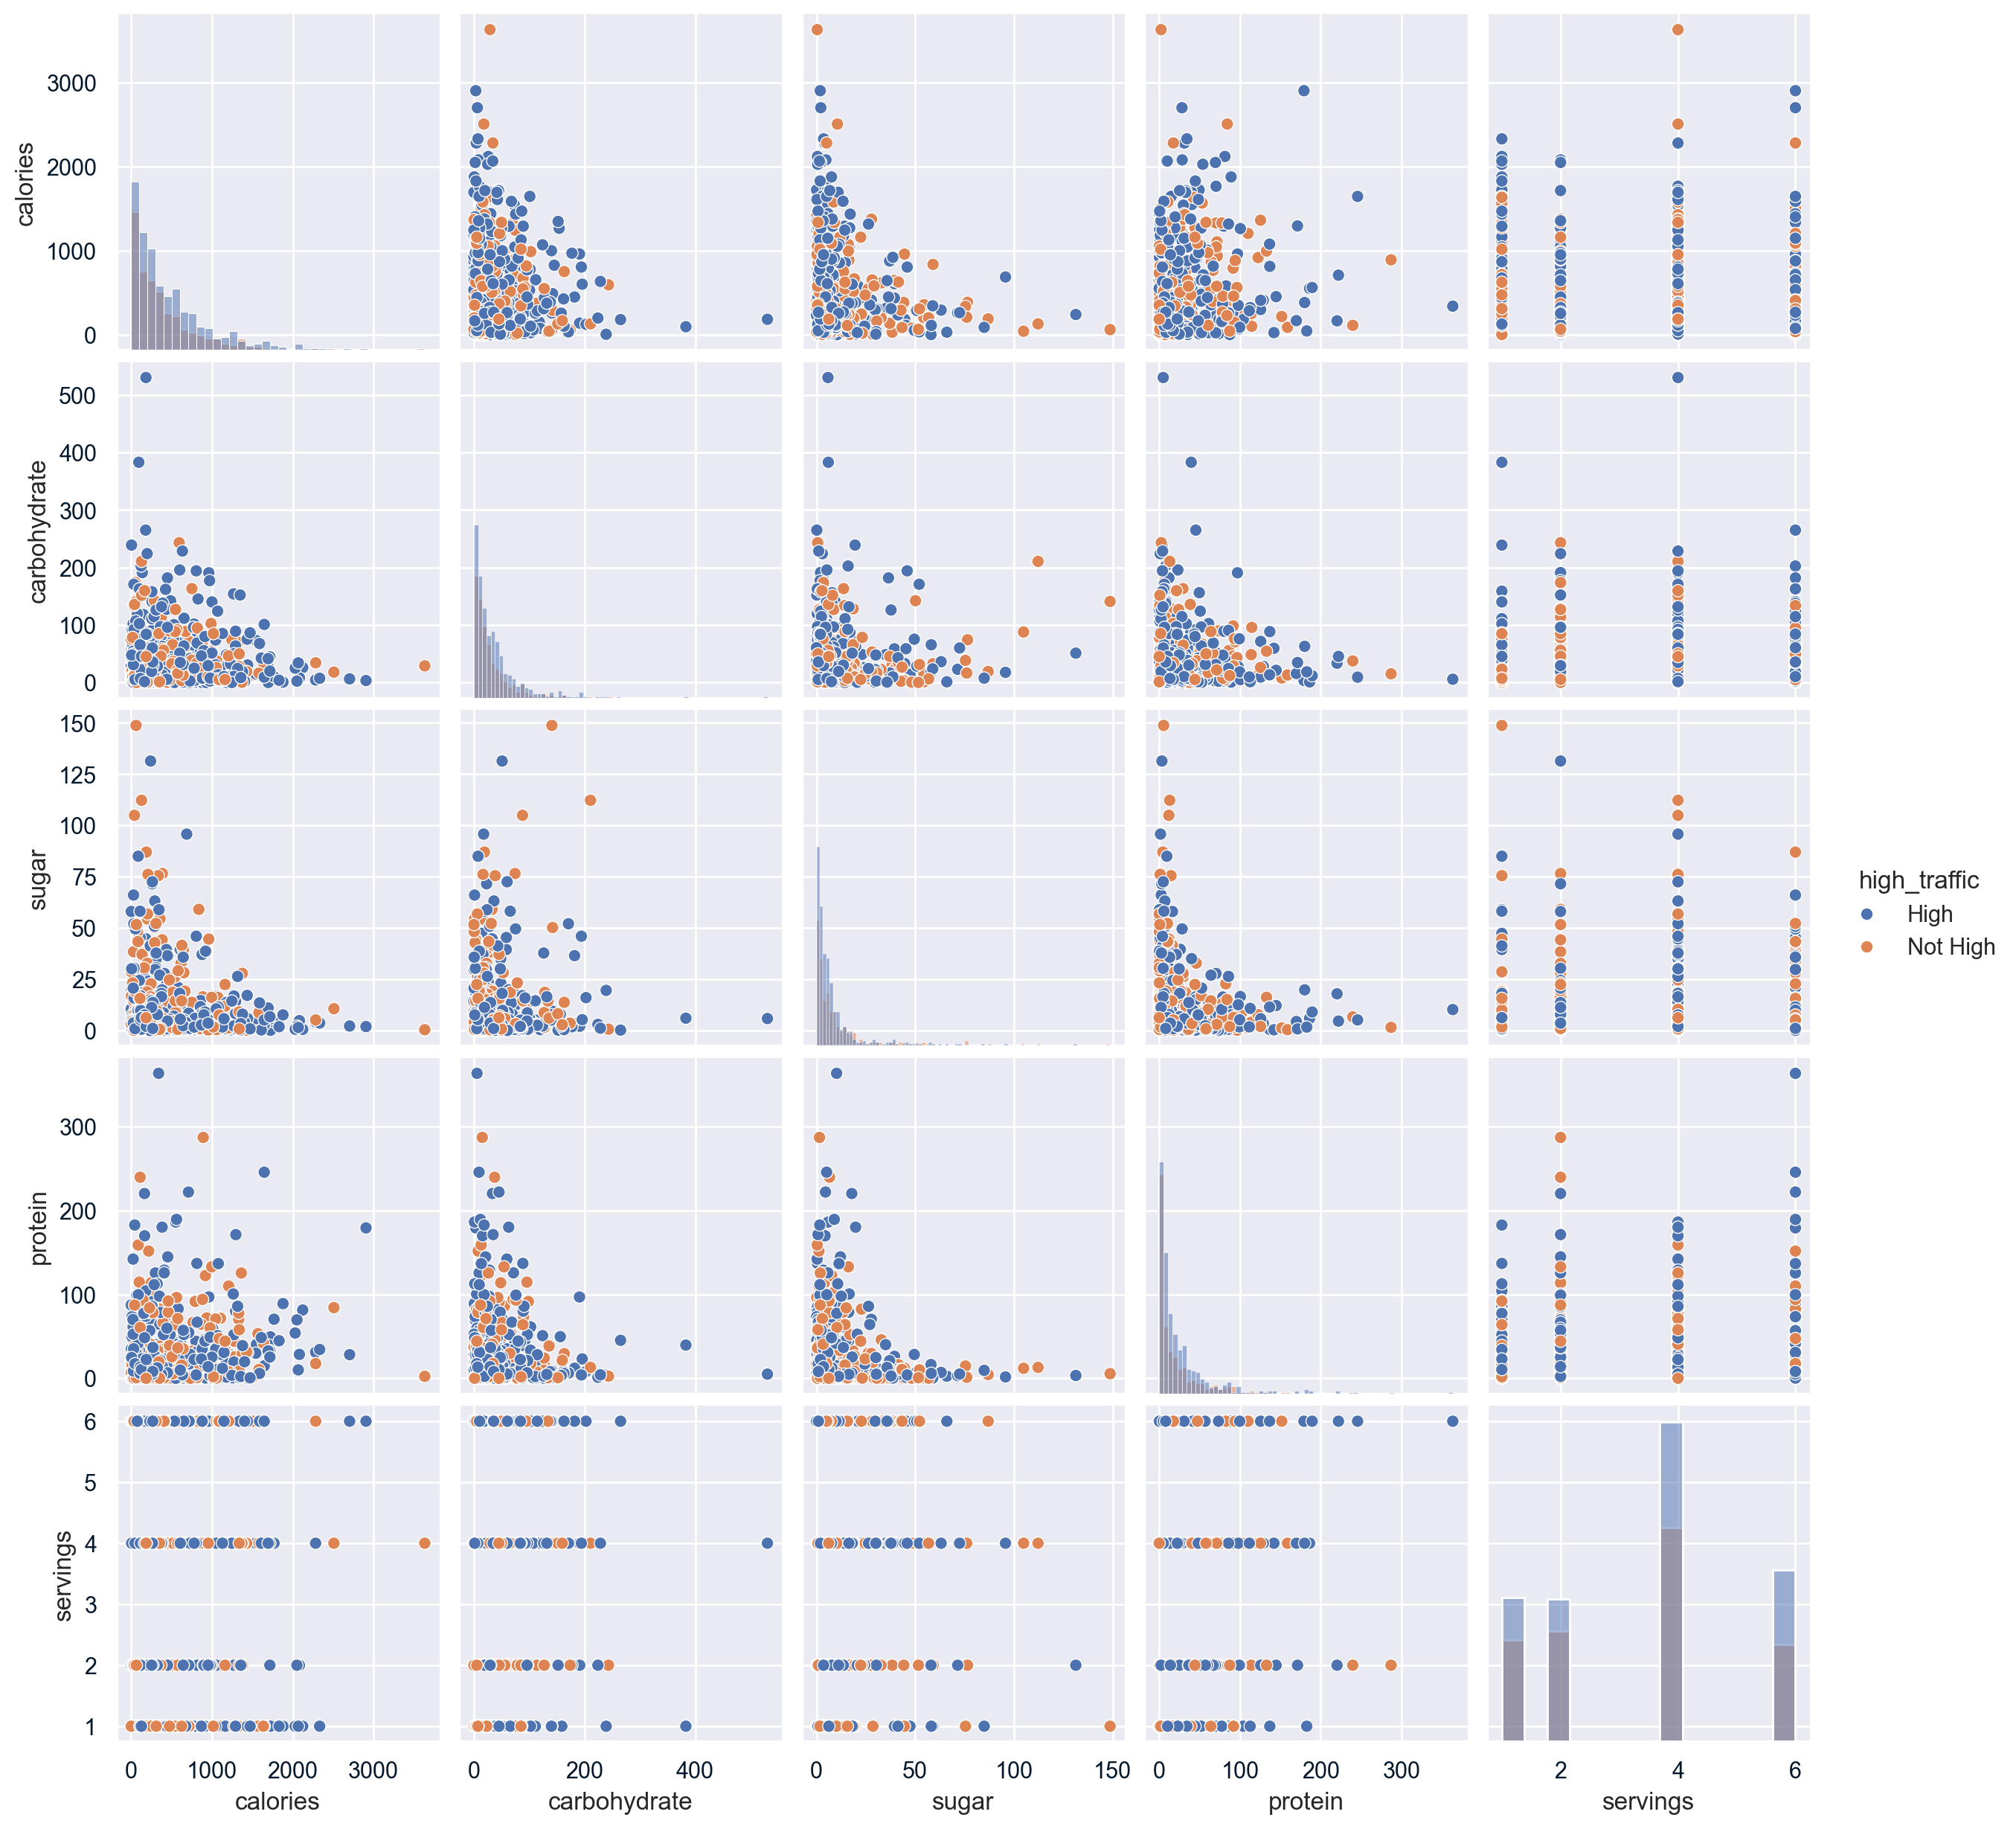

In [143]:
# show correlation of each column using pairplot
pp = sns.pairplot(df_recipe_site,
                  diag_kind='hist',
                  hue='high_traffic')

plt.show()

**Q3 Answer:** After showing pairplot, we can hardly find any corelation among the columns. addtionally high values in each column doesnt predict the tendency to high traffic label as shown the diagonal histplot

## Model Development

In this module, the Feature columns were modified to prevent any bias and proper data representation for the models.

**The engineered features are**

1.  Applied yeo-johnson power trasnformtion for the numeric columns to reduce skewness
2.  Encoded nominal Categorical data (category column)
3.  Maped ordinal categorical data (High_traffic column)
4.  Split the data for validation and ensured stratfication of the split
5.  Defined Kfolds for Cross validation of the models
6.  Investigated existance of colinearity after feature engineering to ensure proper feature selection
7.  Decide on which models preform well on our dataframe

In [144]:
# creating a copy for features modifications
training_df = df_recipe_site.copy()

# transform all numeric columns
numeric_cols =  training_df.select_dtypes(include=[np.number])
training_df[numeric_cols.columns] = (PowerTransformer()
                                     .fit_transform(numeric_cols))

# Map ordinal column and Encoding nominal column
traffic_mapping = {"Not High":0, "High":1}
training_df = pd.get_dummies(training_df,
                             prefix=['cat_'],
                             columns=['category'],
                             dtype='int').replace(traffic_mapping)

# split data into features and high traffic as the label
x = training_df.drop(columns='high_traffic')
y = training_df['high_traffic']

In [145]:
# split train and test data for validation
X_train,X_test,Y_train, Y_test = train_test_split(x,
                                                  y,
                                                  test_size=0.25,
                                                  random_state=121,
                                                  stratify=y)

# define K-folds for K-folds cross validation
kf = KFold(n_splits=10,
            shuffle=True,
            random_state=121)

n_cv= kf.n_splits

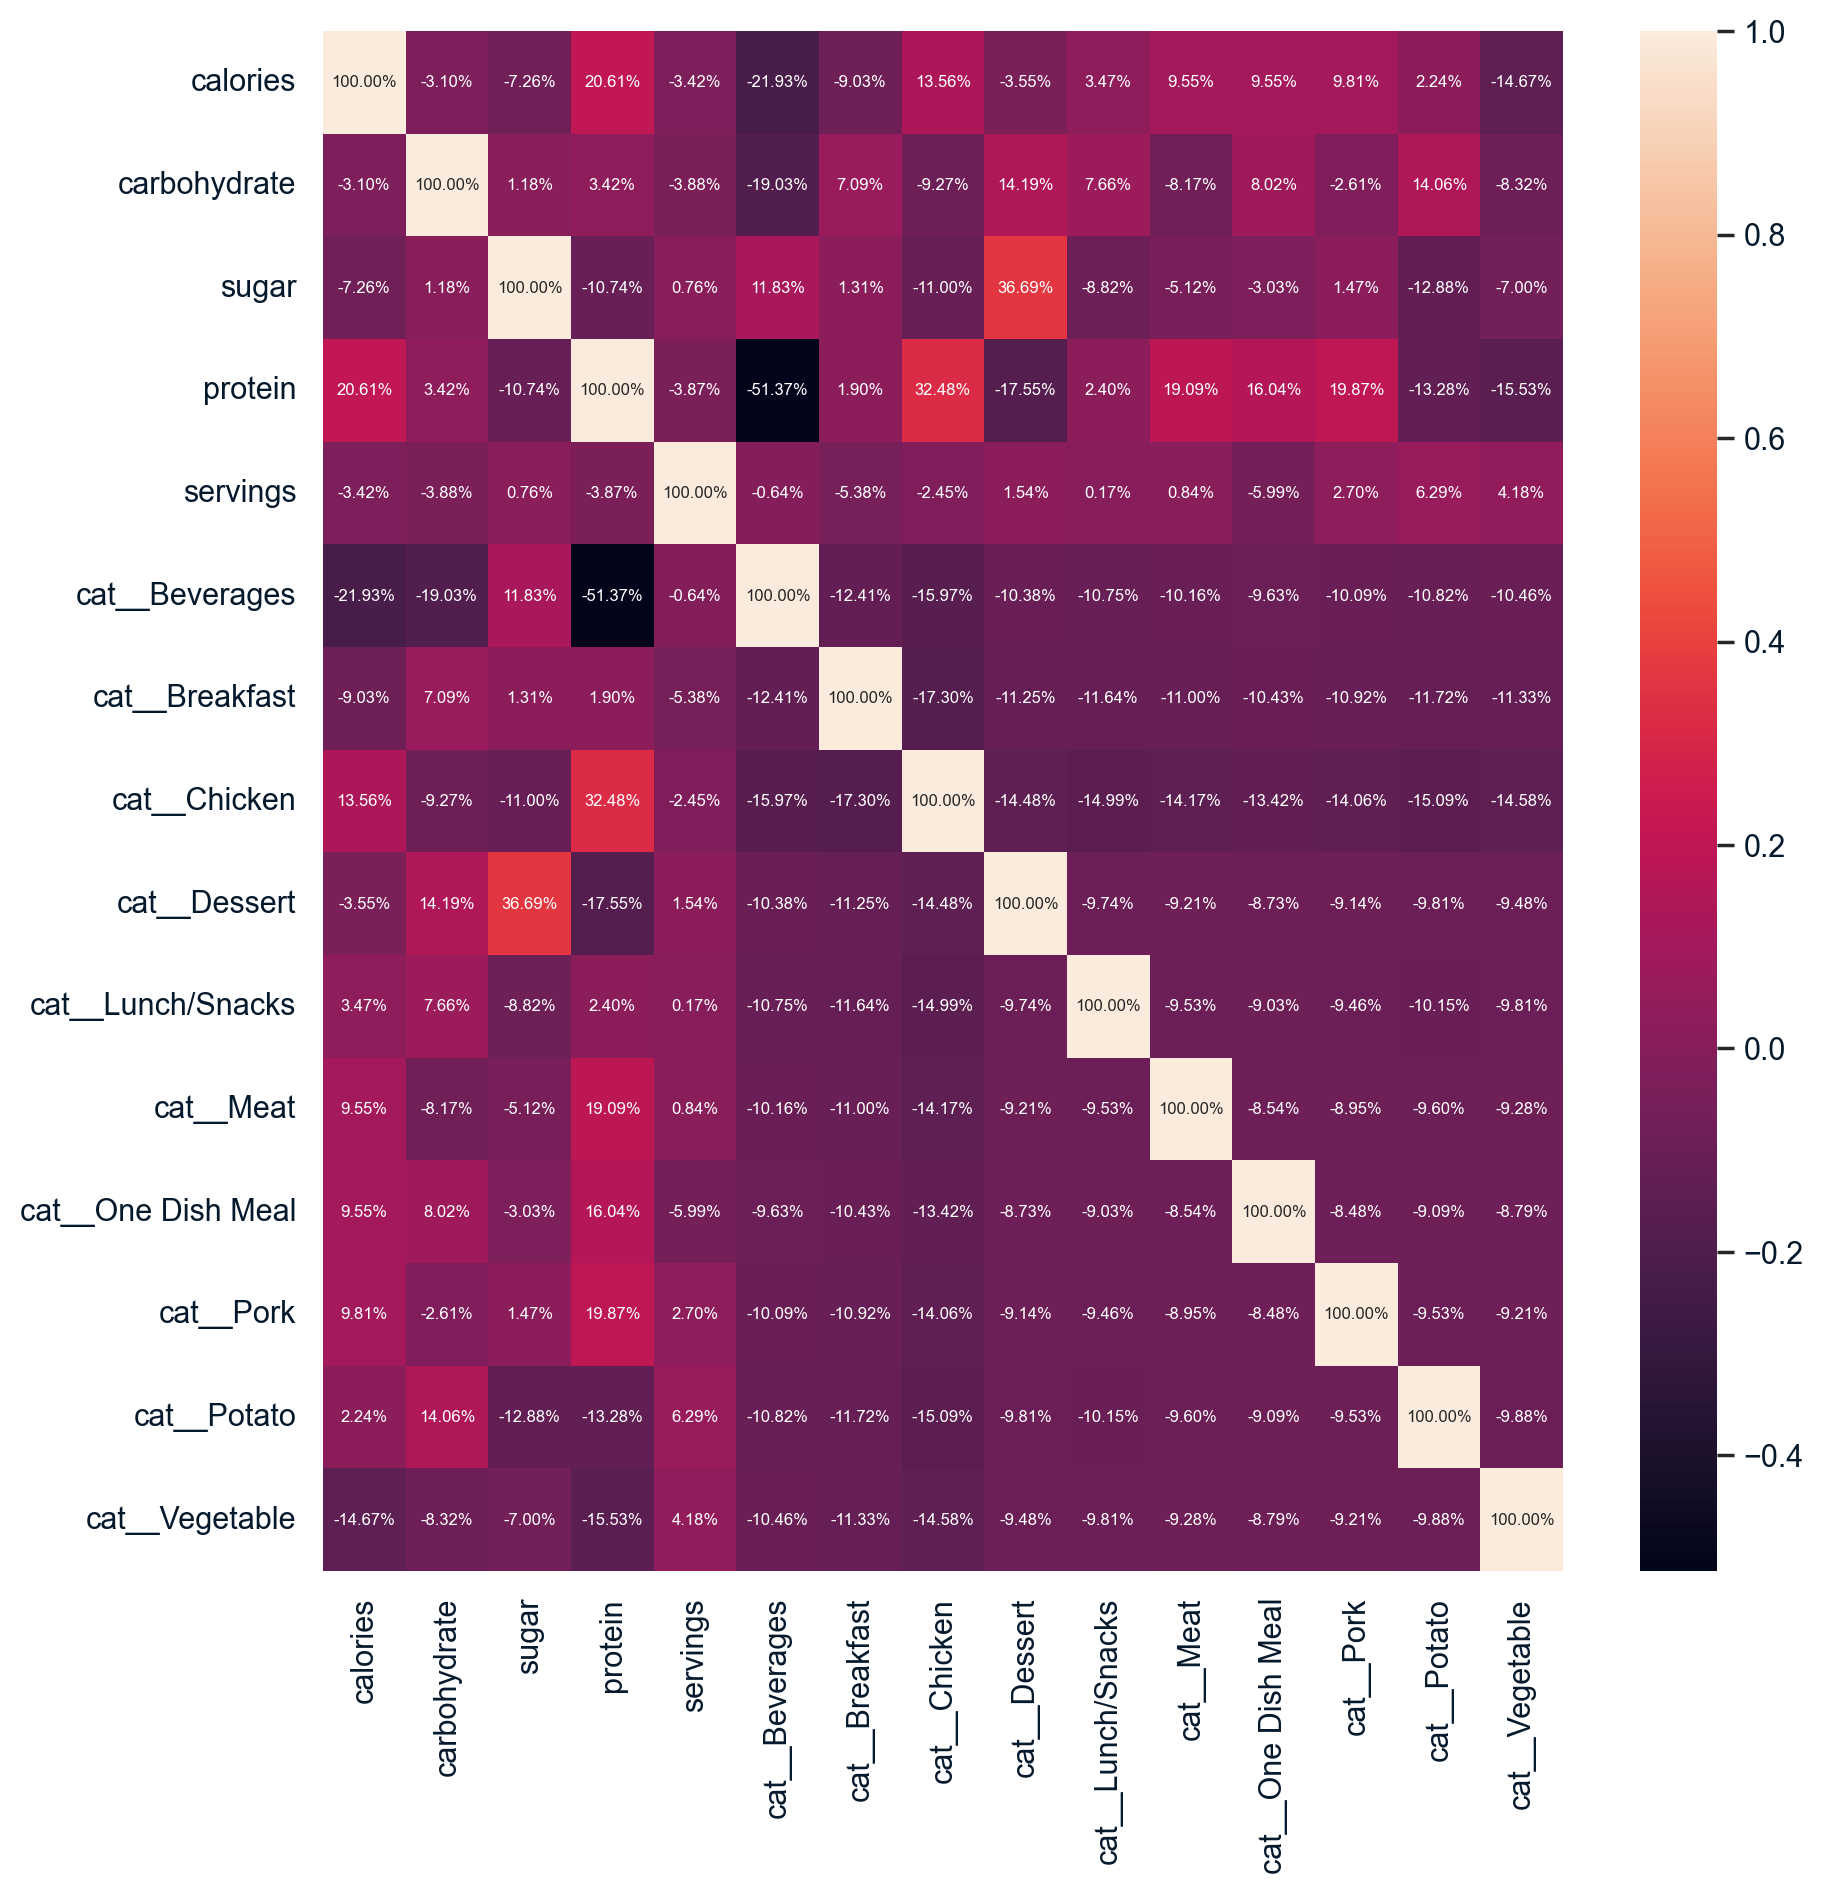

In [146]:
# Investigate colinearity
plt.figure(figsize=(10,10))
sns.heatmap(training_df.corr(),
            annot=True,
            fmt=".2%",
            annot_kws={"size":6})
plt.show()

Since we are dealing with supervised classification problems, popular sklearn was investigated based on F1-score performance and MSE. 

- F1-score measures the harmonic mean precision and recall on the positive class while accuracy looks at correctly classified observations both positive and negative. we want a model that can be 80% accurate in predicting high traffic therefore this is the most suitable score to assess our aim.

- MSE measures the average squared difference between the predicted and the actual target values within a dataset which is important estimator for the preformance of our model.

based on the previous values we decide which models to include based on those values.

Logistic regression is our base model since it performs really well with well-known assumptions of the data and uses a simple algorithm.

Logistic regression 
 f1 score = 0.8116 MSE = 0.2321
SVC 
 f1 score = 0.7986 MSE = 0.2589
Random forest 
 f1 score = 0.7746 MSE = 0.2857
Gradient boosting 
 f1 score = 0.7536 MSE = 0.3036
Decision Tree 
 f1 score = 0.7306 MSE = 0.3259
K-neighbors 
 f1 score = 0.7491 MSE = 0.3080
ada boosting 
 f1 score = 0.7891 MSE = 0.2768
GaussianNB 
 f1 score = 0.7243 MSE = 0.2991
LDA 
 f1 score = 0.8015 MSE = 0.2411
QDA 
 f1 score = 0.7510 MSE = 0.2812


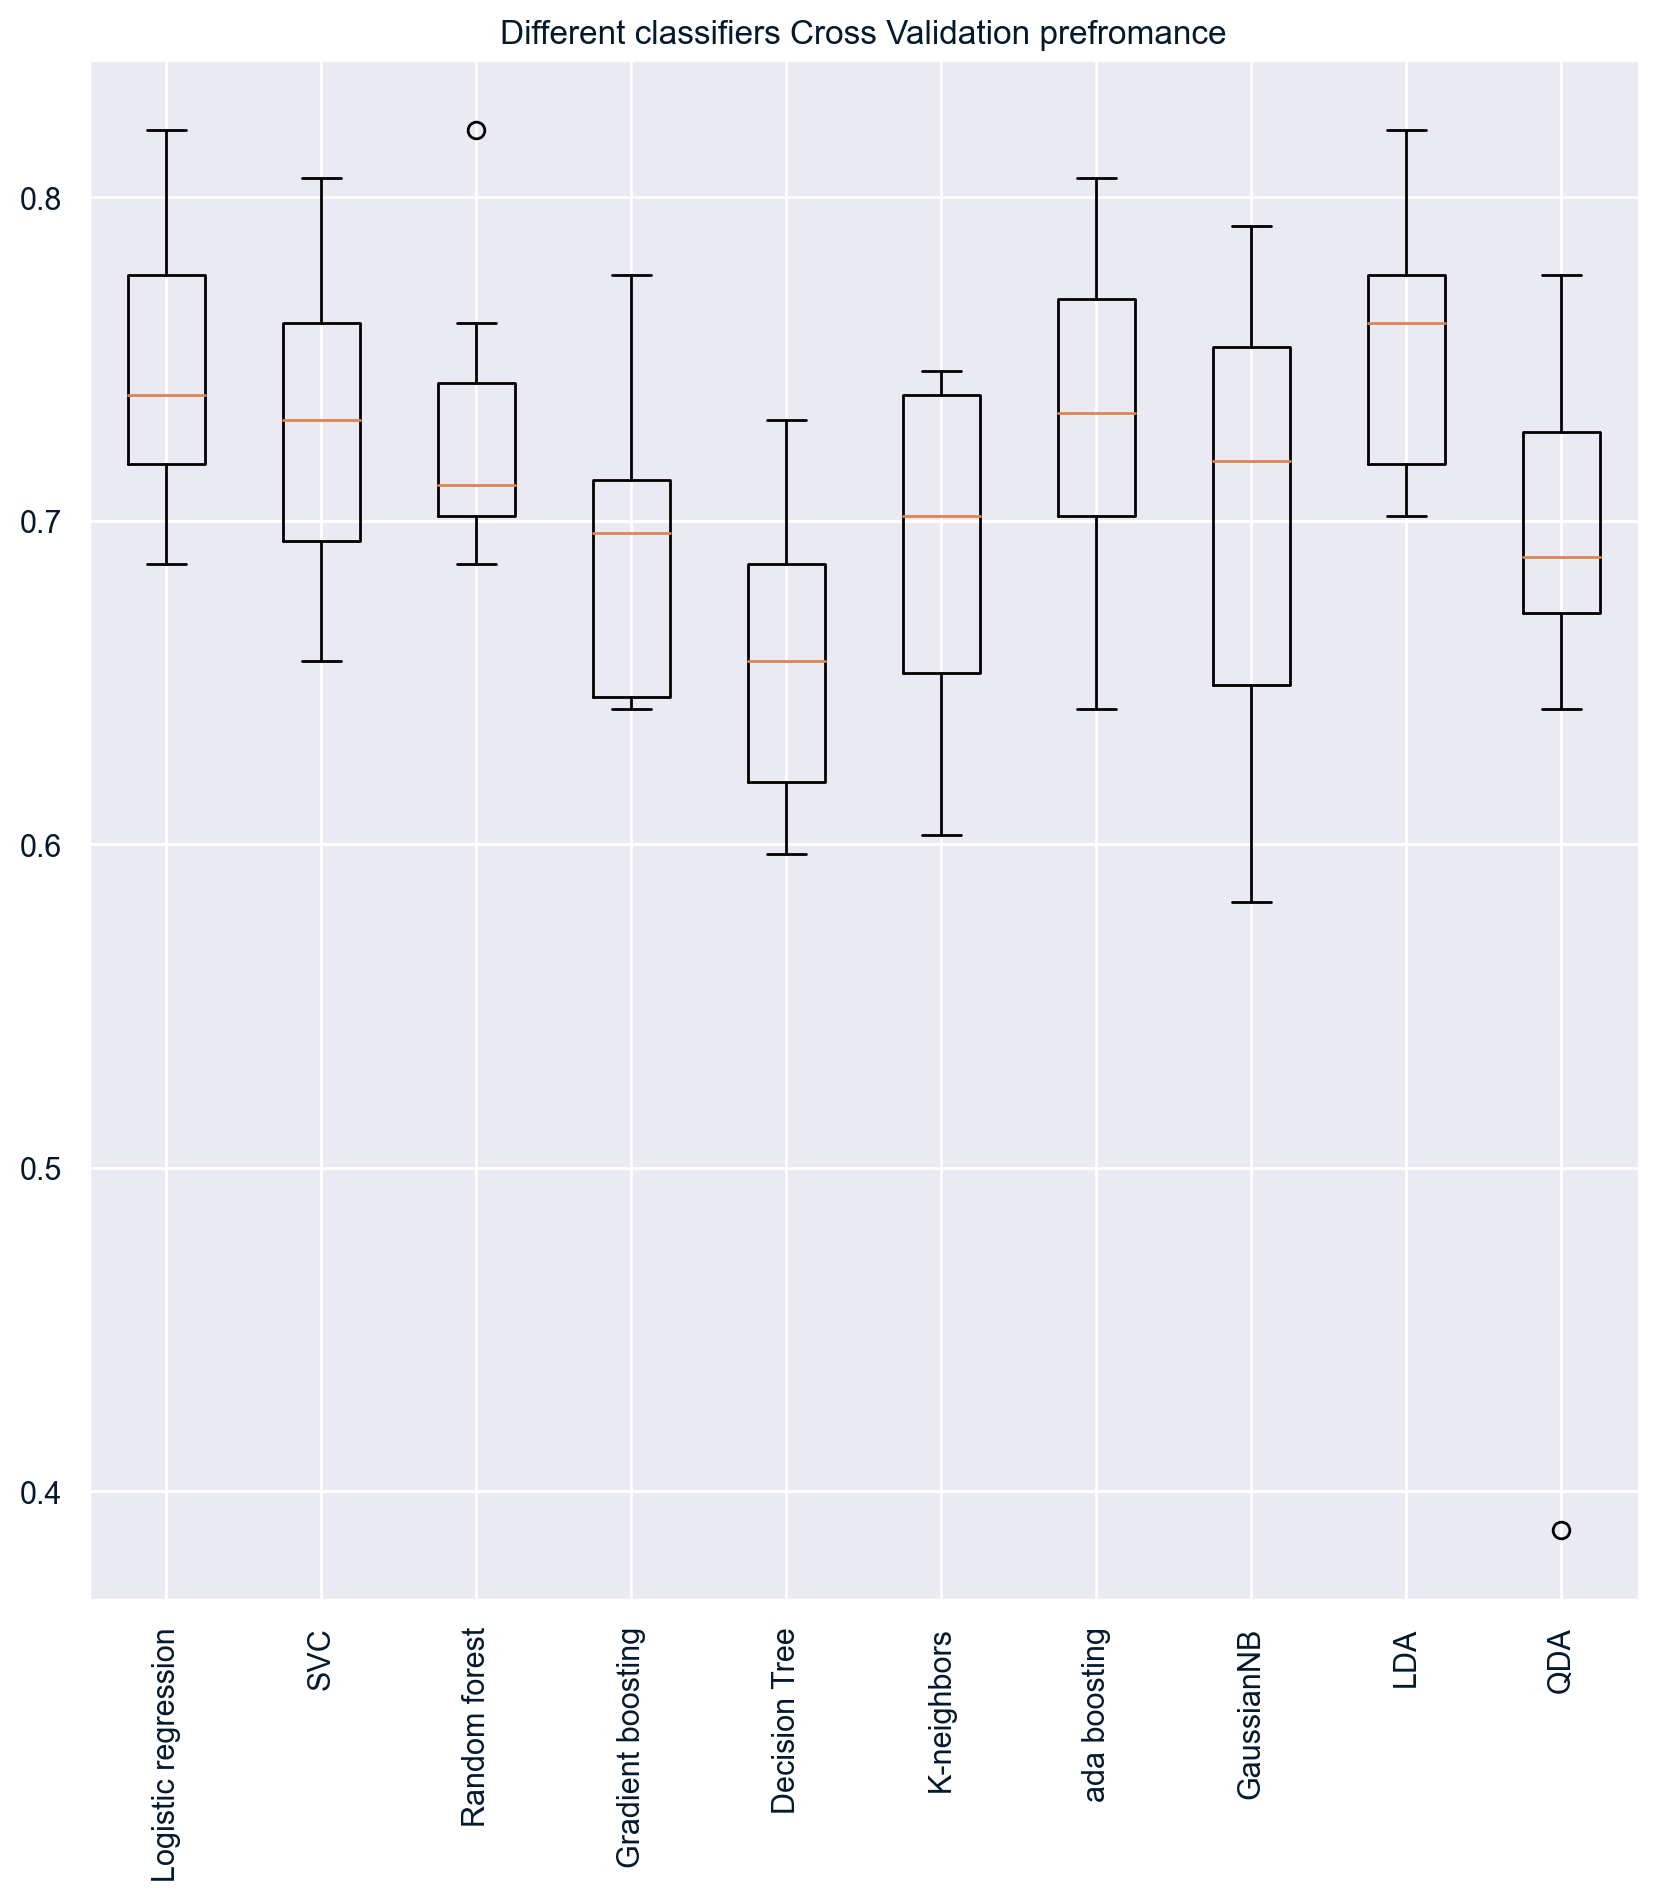

In [147]:
# Comparsion of different classifiers preformance
classifiers = {'Logistic regression':LogisticRegression(random_state=121),
              'SVC':SVC(random_state=121),
              'Random forest':RandomForestClassifier(random_state=121),
              'Gradient boosting':GradientBoostingClassifier(random_state=121),
              'Decision Tree':DecisionTreeClassifier(random_state=121),
              'K-neighbors':KNeighborsClassifier(),
              'ada boosting':AdaBoostClassifier(random_state=121,
                                                 algorithm='SAMME'),
              'GaussianNB':GaussianNB(),
              'LDA':LinearDiscriminantAnalysis(),
              'QDA':QuadraticDiscriminantAnalysis()}

classifiers_results = []
for key, model in classifiers.items():
  model.fit(X_train, Y_train)
  y_pred_model = model.predict(X_test)
  cv_score = cross_val_score(model, X_train, Y_train, cv=kf)
  classifiers_results.append(cv_score)
  print(f'{key}',
        '\n',
        f'f1 score = {f1_score(Y_test, y_pred_model):.4f}',
        f'MSE = {MSE(Y_test, y_pred_model):.4f}')

plt.figure(figsize=(10,10))
plt.boxplot(x=classifiers_results,labels=classifiers.keys())
plt.xticks(rotation=90)
plt.title('Different classifiers Cross Validation prefromance')
plt.show()

the DATA shows that logistic model, SVC and LDA are best preforming model according to our defined matrices

In [148]:
# Define the hyperparameter grid fo Logistic Regression
log_parameters = {'solver': ['newton-cg', 'lbfgs',
                              'liblinear', 'sag',
                              'saga'],
              'penalty':['elasticnet','l1','l2'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100]
                  }

# Define the hyperparameter grid fo LDA
LDA_parameters = {'solver':['svd', 'lsqr', 'eigen'],
                  'shrinkage': [0,0.25,0.50,0.75, 0.80, 0.85]
                  }

# Define the hyperparameter grid fo SVC
svc_parameters = {'C':[1,10,100],
                 'gamma':[1,0.1,0.001,0.0001],
                 'kernel':['poly','rbf','sigmoid']
                  }

# preform gridsearch to find tuned hyperparameters
log_grid_search = GridSearchCV(estimator = LogisticRegression(random_state=121),
                               param_grid = log_parameters,
                               scoring = 'accuracy',
                               cv = kf,
                               verbose=0)

svc_grid_search = GridSearchCV(estimator = SVC(random_state=121),
                               param_grid = svc_parameters,
                               scoring = 'accuracy',
                               verbose=0)

LDA_grid_search = GridSearchCV(estimator= LinearDiscriminantAnalysis(),
                              param_grid= LDA_parameters,
                              scoring='accuracy',
                              verbose=0)

# Fit the gridsearch
LDA_grid_search.fit(X_train, Y_train)
svc_grid_search.fit(X_train, Y_train)
log_grid_search.fit(X_train, Y_train)

# Print the best parameters


print("(log best parameters):",log_grid_search.best_params_)
print("(LDA best parameters):",LDA_grid_search.best_params_)
print("(SVC best parameters):",svc_grid_search.best_params_)


(log best parameters): {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
(LDA best parameters): {'shrinkage': 0, 'solver': 'lsqr'}
(SVC best parameters): {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


GidSearch was preformed to finetune hyperparamters for each model to Maxmized preformance

## Models Evaluation

The preformance of each model was invetigated using:
- F1 score 
- MSE
- Kfolds Cross-validation accuracy
- Confusion matrix (addtional graph to see True Positive,False Positive, False Negative and True Negative)

this module concludes with the logistic model as the best model in term of f1_score -that measure harmonic mean of precison and recall as mentioned in the model development section - and in terms of low MSE. however for the general accuracy, according to the cross validation the SVC showed better average preformance but since the team focused on high traffic label, this metrics doesnt suit the aim therfore SVC wasnt selected.


LogisticRegression(C=1, random_state=121, solver='liblinear') f1_score= 0.8116
LogisticRegression(C=1, random_state=121, solver='liblinear') MSE= 0.2321
LogisticRegression(C=1, random_state=121, solver='liblinear') Training set score: 0.7660
LogisticRegression(C=1, random_state=121, solver='liblinear') Test set score: 0.7679
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        90
           1       0.79      0.84      0.81       134

    accuracy                           0.77       224
   macro avg       0.76      0.75      0.75       224
weighted avg       0.77      0.77      0.77       224

---------------------------------------------------------------------


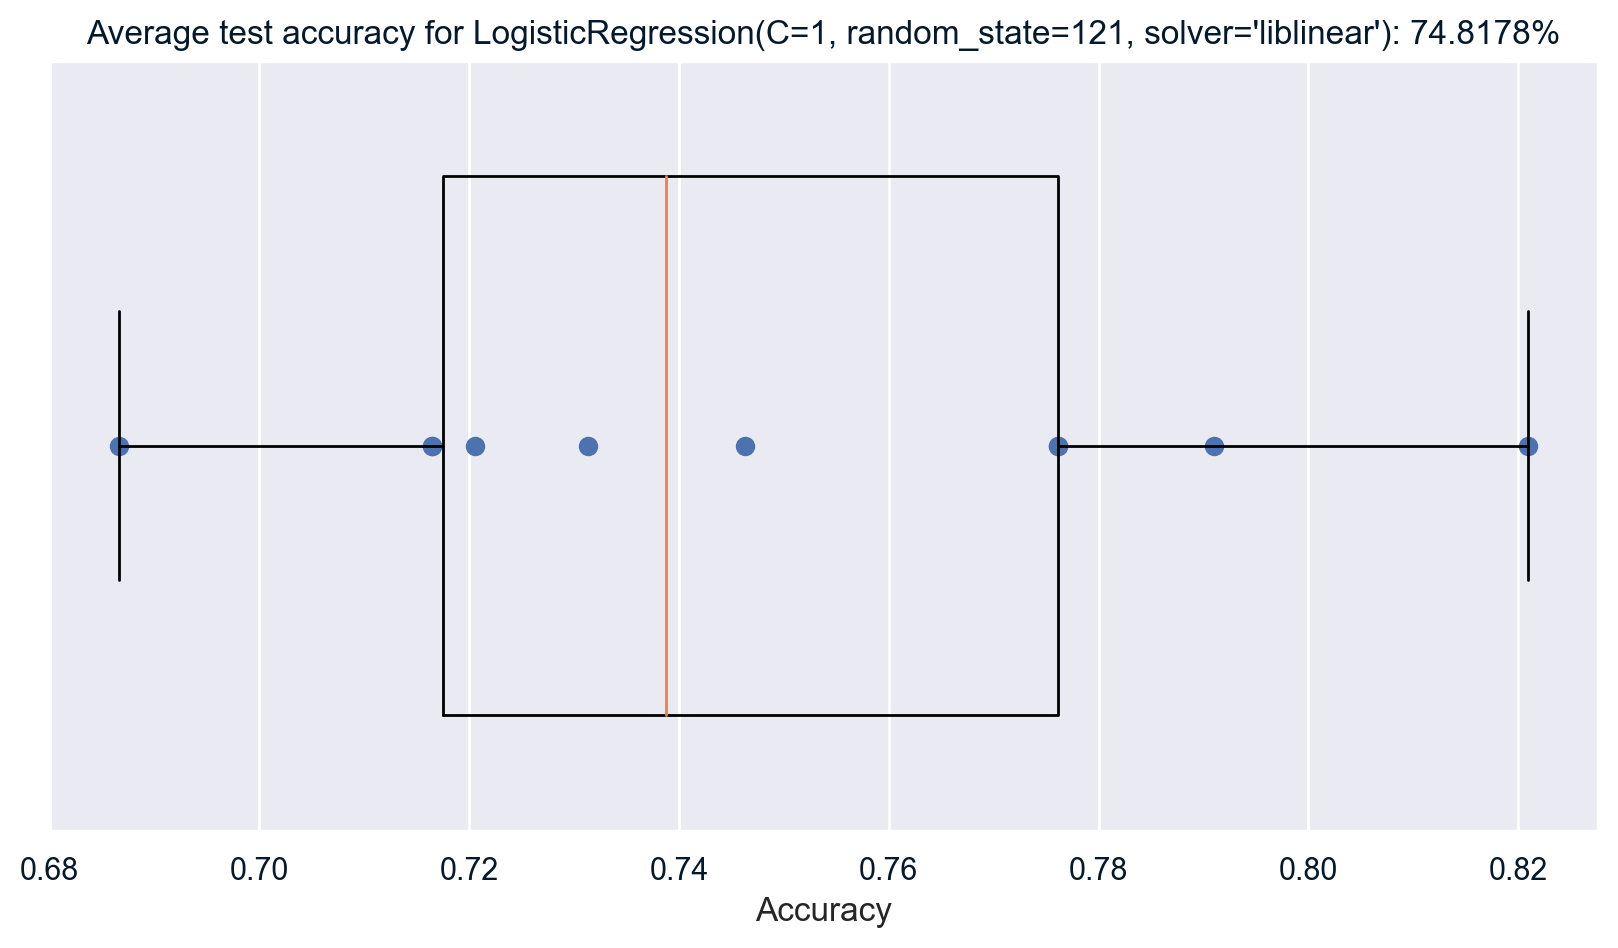

<Figure size 1000x1000 with 0 Axes>

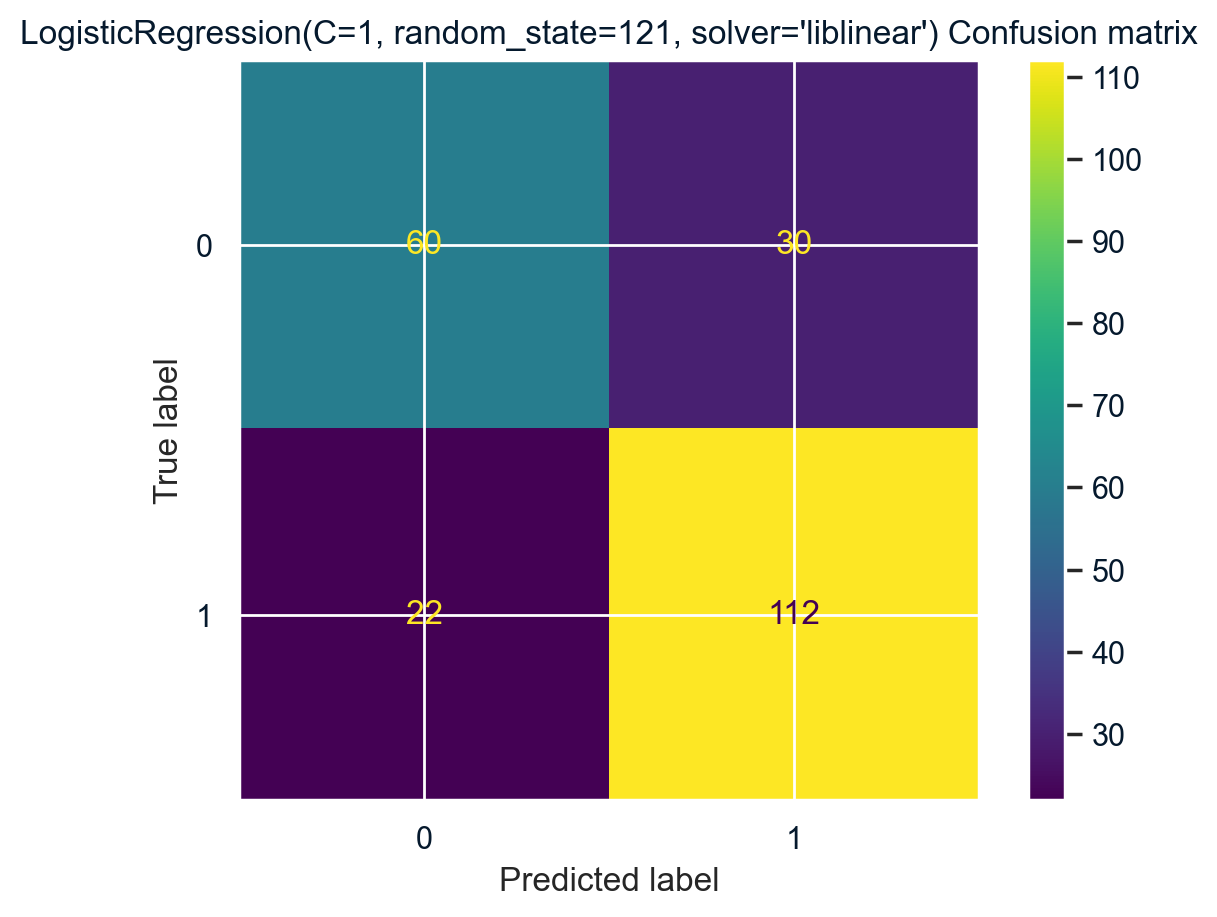

LinearDiscriminantAnalysis(shrinkage=0, solver='lsqr') f1_score= 0.8116
LinearDiscriminantAnalysis(shrinkage=0, solver='lsqr') MSE= 0.2321
LinearDiscriminantAnalysis(shrinkage=0, solver='lsqr') Training set score: 0.7630
LinearDiscriminantAnalysis(shrinkage=0, solver='lsqr') Test set score: 0.7589
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        90
           1       0.79      0.84      0.81       134

    accuracy                           0.77       224
   macro avg       0.76      0.75      0.75       224
weighted avg       0.77      0.77      0.77       224

---------------------------------------------------------------------


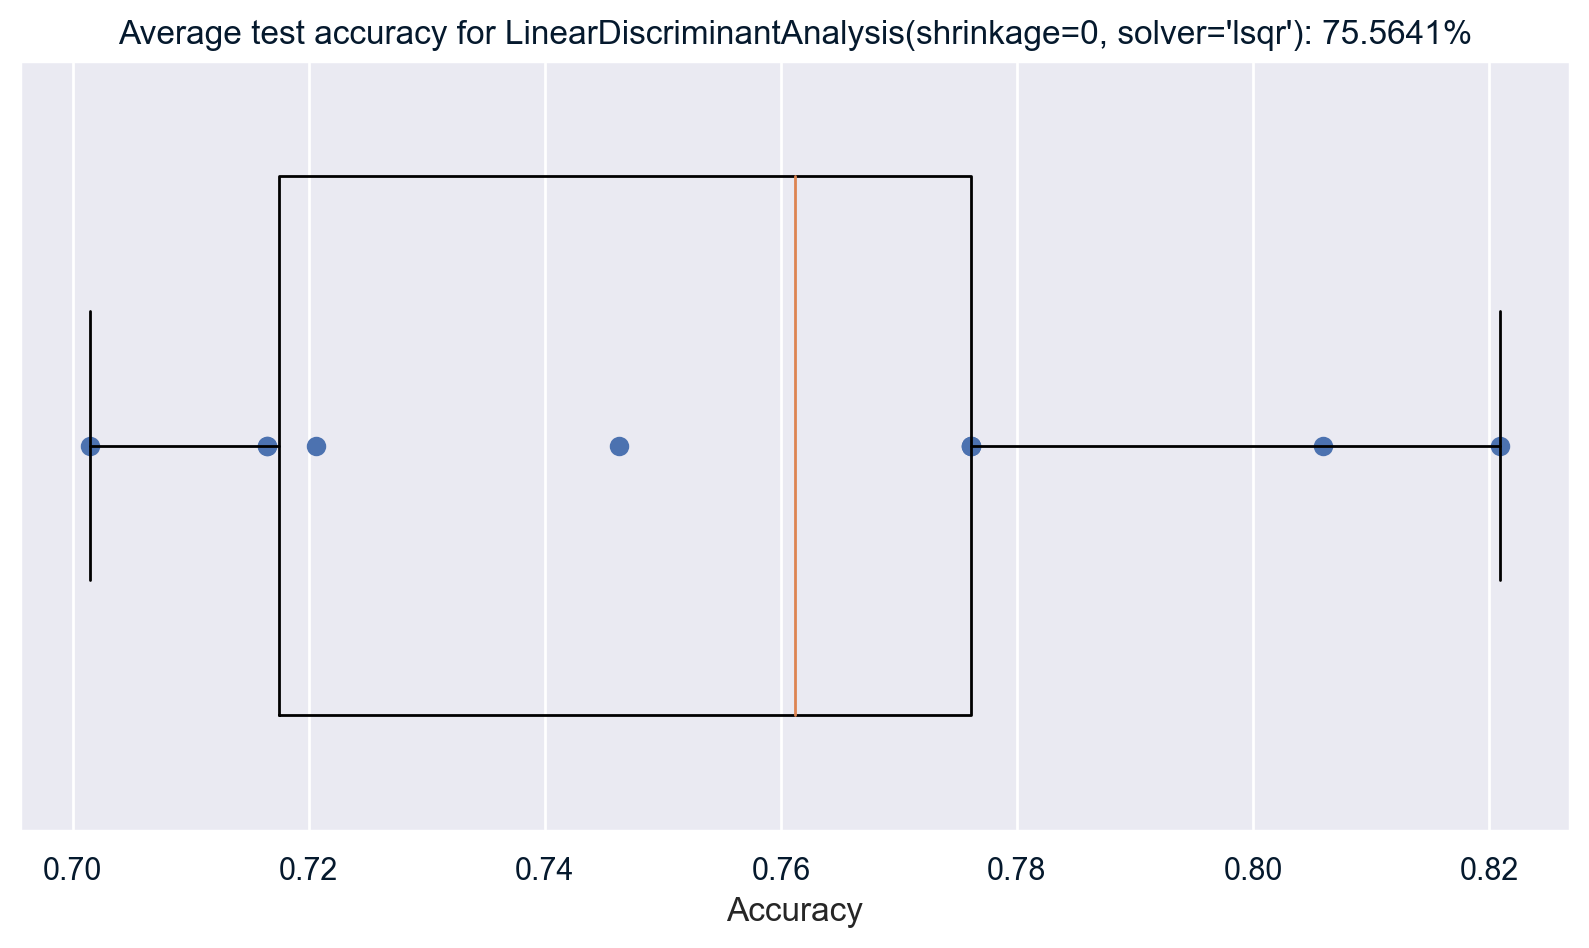

<Figure size 1000x1000 with 0 Axes>

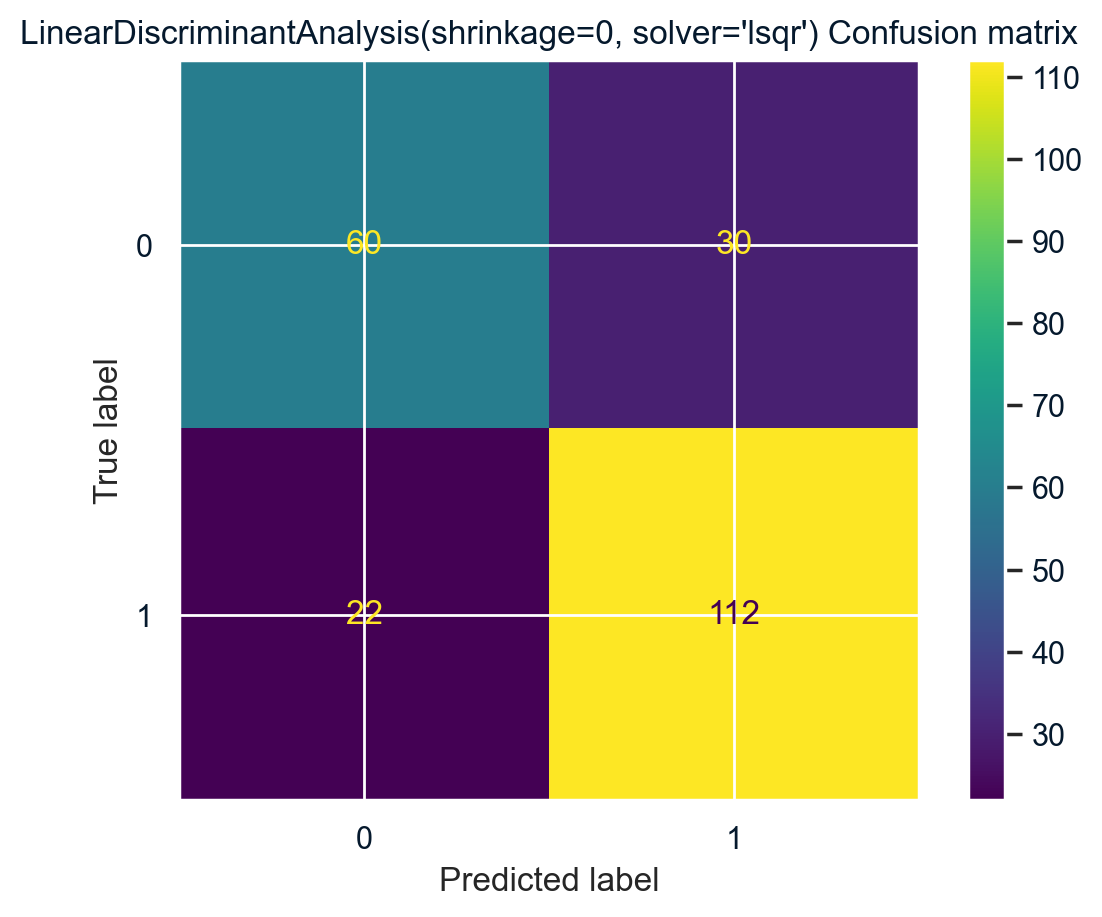

SVC(C=100, gamma=0.001) f1_score= 0.8116
SVC(C=100, gamma=0.001) MSE= 0.2321
SVC(C=100, gamma=0.001) Training set score: 0.7630
SVC(C=100, gamma=0.001) Test set score: 0.7589
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        90
           1       0.79      0.84      0.81       134

    accuracy                           0.77       224
   macro avg       0.76      0.75      0.75       224
weighted avg       0.77      0.77      0.77       224

---------------------------------------------------------------------


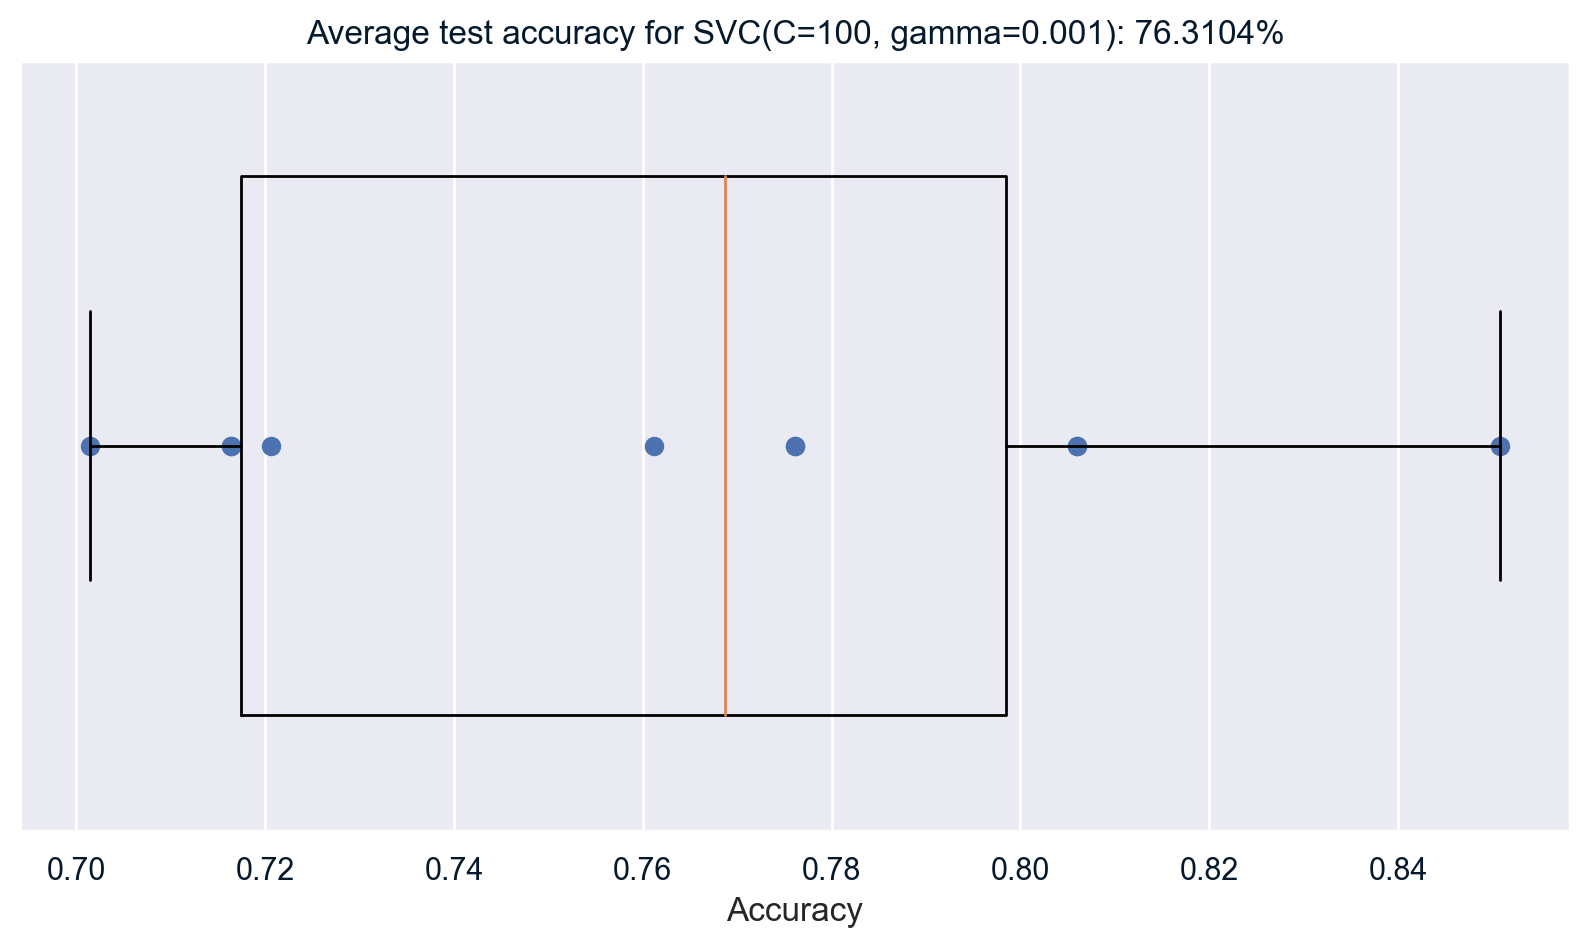

<Figure size 1000x1000 with 0 Axes>

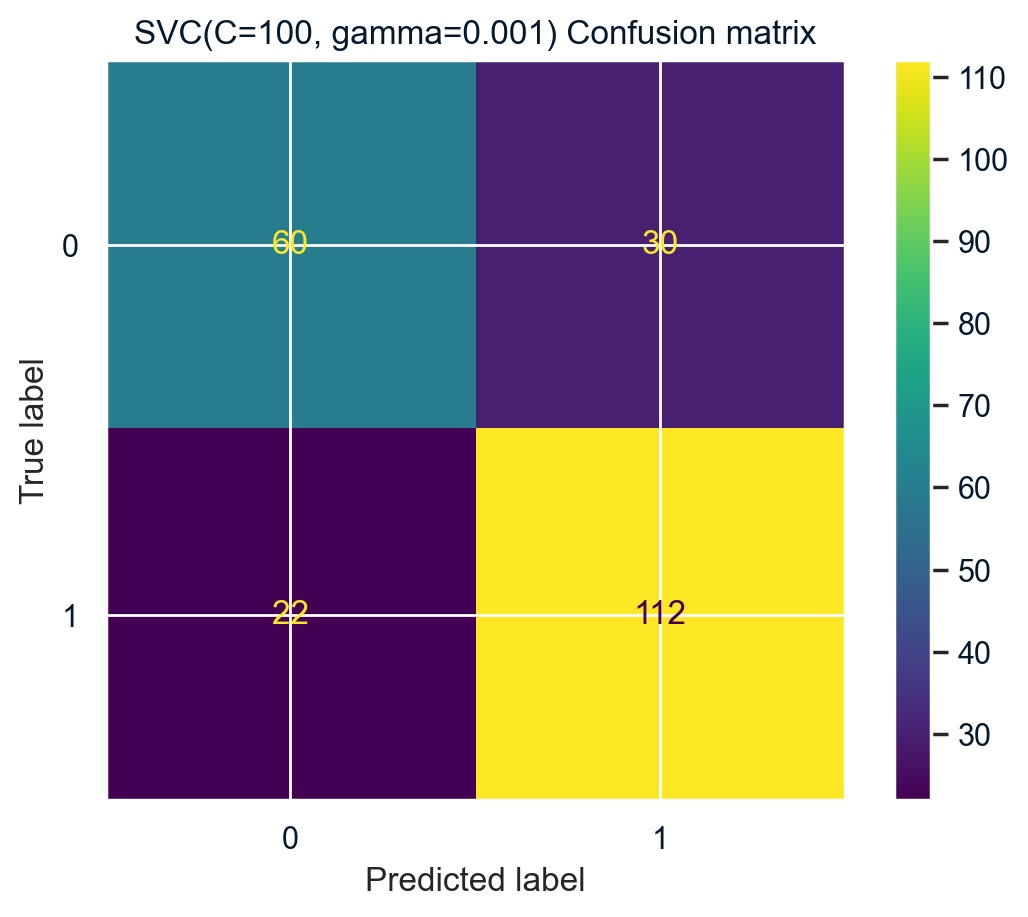

In [149]:
# find f1-score and MSE to evaluate model accuracy and error
log_model = LogisticRegression(C= 1,
                               solver='liblinear',
                               penalty='l2',
                               random_state=121)

LDA_model = LinearDiscriminantAnalysis(solver='lsqr',
                               shrinkage=0)

SVC_model = SVC(kernel='rbf',
                C=100,
                gamma=0.001)

selected_models = [log_model, LDA_model, SVC_model]

for model in selected_models:
  model.fit(X_train,
            Y_train)
  y_pred = log_model.predict(X_test)
  # find f1-score and MSE to evaluate model accuracy and error
  print(f'{model} f1_score= {f1_score(Y_test, y_pred):.4f}')
  print(f'{model} MSE= {MSE(Y_test, y_pred):.4f}')

  # find if the model over fit by comparing both train and test score
  print(f'{model} Training set score: {model.score(X_train, Y_train):.4f}')
  print(f'{model} Test set score: {model.score(X_test, Y_test):.4f}')

  # create classification report
  print(classification_report(Y_test, y_pred))
  print('---------------------------------------------------------------------')
  # Preform Cross-validation
  cv_score = cross_val_score(model, X_train, Y_train, cv=kf)

  # Visualize CV average score
  plt.figure(figsize=(10,5))
  plt.boxplot(cv_score,
           vert=False,
           widths=.7)
  plt.scatter(cv_score,np.ones(n_cv))
  plt.xlabel("Accuracy")
  plt.yticks([])
  plt.title(f"Average test accuracy for {model}: {cv_score.mean():.4%}")
  plt.show()

  # visualizing confusion matrices
  cm = confusion_matrix(Y_test,
                      y_pred,
                      sample_weight=None,
                      normalize=None)

  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  plt.figure(figsize=(10,10))
  disp.plot()
  plt.title(f'{model} Confusion matrix')
  plt.show()

In [150]:
# bootstrap by resampling X and Y training data
X_train_boot = resample(X_train,
                        n_samples=10000,
                        replace=True,
                        random_state=121)

Y_train_boot =  resample(Y_train,
                        n_samples=10000,
                        replace=True,
                        random_state=121)

# Test the effect of on the selected models
for model in selected_models:
  model = model.fit(X_train_boot, Y_train_boot)
  y_pred_model = model.predict(X_test)
  print(f'{model}',
        '\n',
        f'f1 score = {f1_score(Y_test, y_pred_model):.4f}',
        f'MSE = {MSE(Y_test, y_pred_model):.4f}')


LogisticRegression(C=1, random_state=121, solver='liblinear') 
 f1 score = 0.8172 MSE = 0.2277
LinearDiscriminantAnalysis(shrinkage=0, solver='lsqr') 
 f1 score = 0.8073 MSE = 0.2366
SVC(C=100, gamma=0.001) 
 f1 score = 0.8015 MSE = 0.2411


Bootstrapping didnt signficantly improve models preformance and Logistic models remains the best preforming even after bootstrapping

## Business Metrics

based on previous data for the KPIs Defined a Function to extract F1-score of models equal or above 80% fitting our business target of 80% correct postive prediction at a time


In [153]:
def f1_score_kpi(model, X_train, Y_train, X_test, Y_test):
    '' 'find if the F1 score of the model meet the team standard'''
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    f1 = f1_score(Y_test, Y_pred)
    if f1 >= 0.80: 
        return f"Model F1_score = {f1:.4f} meets company goal"
    else:
        return 'model doesnt meet the target'

In [154]:
for model in selected_models:
    print(f'{model}','\n',f1_score_kpi(model, X_train, Y_train, X_test, Y_test))

LogisticRegression(C=1, random_state=121, solver='liblinear') 
 Model F1_score = 0.8116 meets company goal
LinearDiscriminantAnalysis(shrinkage=0, solver='lsqr') 
 Model F1_score = 0.8015 meets company goal
SVC(C=100, gamma=0.001) 
 Model F1_score = 0.8015 meets company goal


## Conclusion:
The aim of the project is to develop a model that can correctly predict high-traffic recipes 80% at a time. the dataset was, manipulated and analyzed to draw helpful conclusions in feature engineering of our dataset followed by a comparison of different sklearn classifiers. logistics model, Support vector classifier, and linear discrimination analysis were shown to be the best-performing classifiers. upon the fine-tuning of the parameters and evaluation, we can conclude that for our current scenario, logistic the model is the best choice in terms of our goal and low MSE.

## Recommendations
- Although bootstrapping was shown to not be significantly effective, more datasets may improve the performance if it was of different quality
- Investigate further why vegetables as most high-traffic category by testing of recipes containing more vegatables will lead to more probable high traffic (Hypothesis testing)
- Add the factor of time in our data since it may draw new correlations and meaningful insights to increase tendency of model to predict high traffic

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation